Author: Leonardo Bocchi

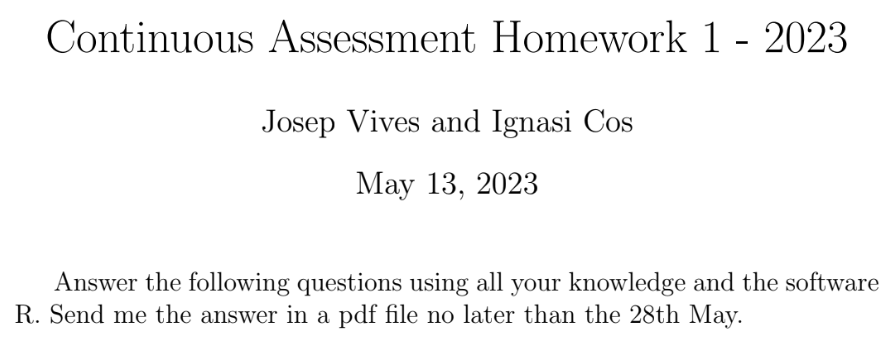

# 1. Introductory models

## 1.1 Load the file ldeaths in the folder datasets of R. Make the graphical representation. Identify and estimate the trend, the seasonal component and the residual component. Are the residuals a sample of an IID noise?

The ldeaths dataset contains the monthly deaths from bronchitis, emphysema and asthma in the UK, 1974–1979, as it can be seen in the documentation

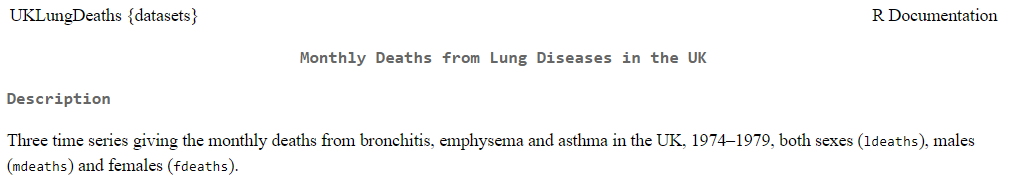

More information about the dataset can be found [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/UKLungDeaths.html)

In [1]:
# Load the necessary package
install.packages("datasets") 
library(datasets)  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


In [2]:
# Load the ldeaths dataset
data(ldeaths) 

Warning message in data(ldeaths):
“data set ‘ldeaths’ not found”


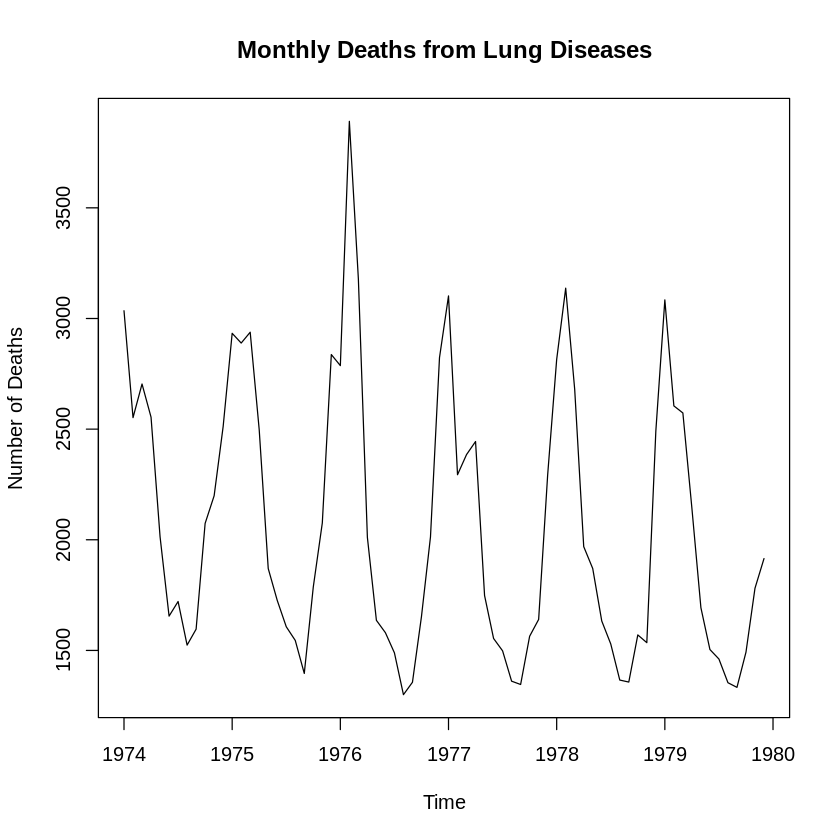

In [3]:
# Convert the dataset into a time series object
ldeaths_ts <- ts(ldeaths, start = c(1974, 1), frequency = 12)

# Create a time series plot
plot(ldeaths_ts, main = "Monthly Deaths from Lung Diseases", ylab = "Number of Deaths")

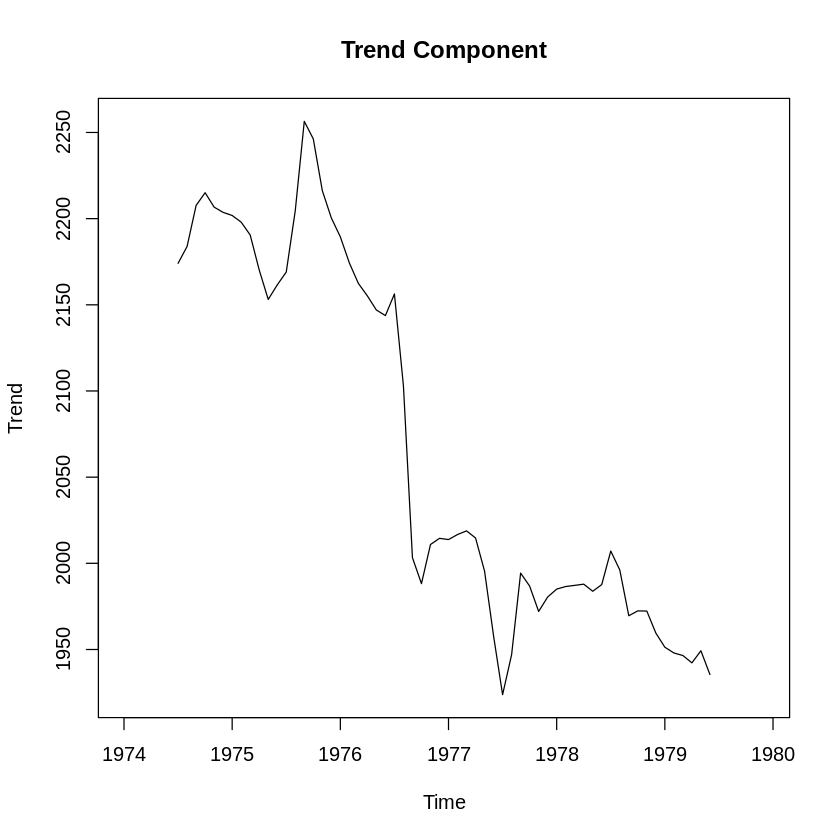

In [4]:
# Decompose the time series
decomp <- decompose(ldeaths_ts)

# Access the estimated components
trend <- decomp$trend
seasonal <- decomp$seasonal
residual <- decomp$random

# Create a time series plot of the trend component
plot(trend, main = "Trend Component", ylab = "Trend")

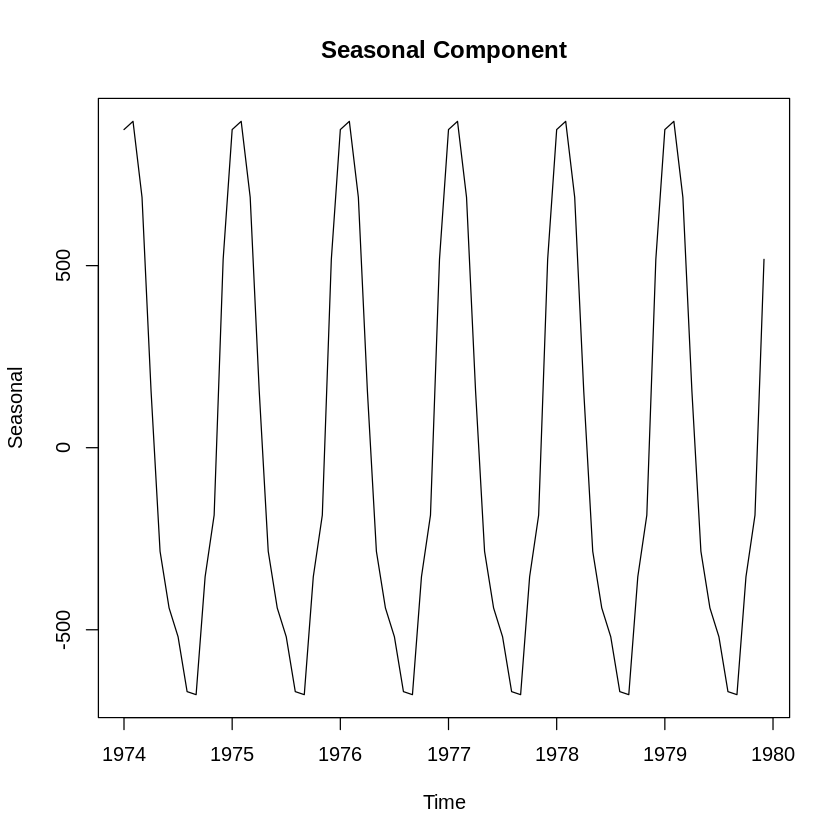

In [5]:
# Create a time series plot of the seasonal component
plot(seasonal, main = "Seasonal Component", ylab = "Seasonal")

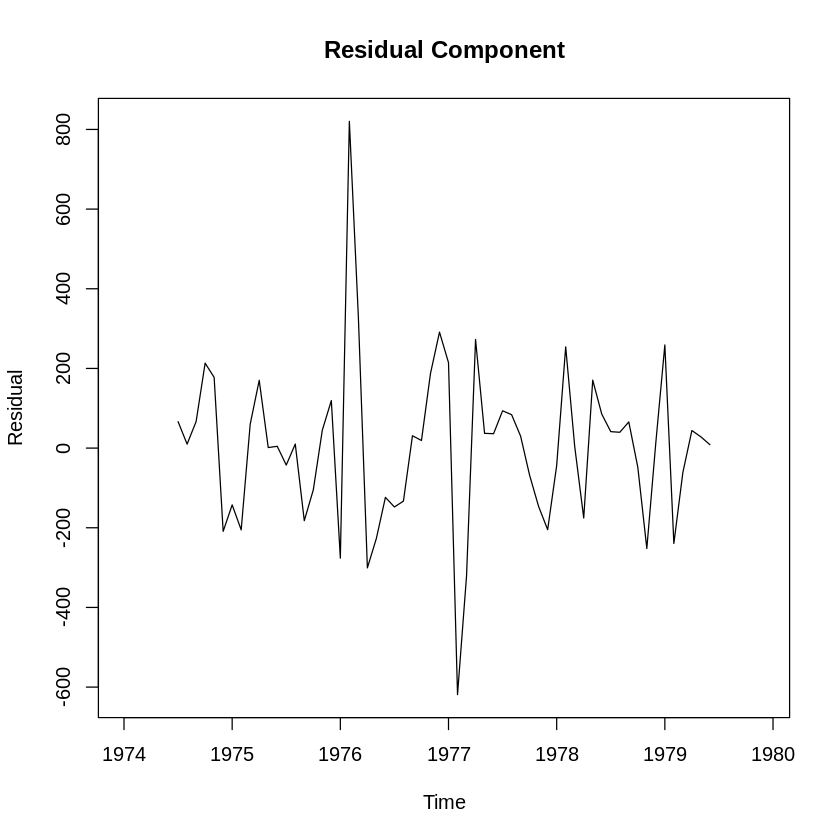

In [6]:
# Create a time series plot of the residual component
plot(residual, main = "Residual Component", ylab = "Residual")

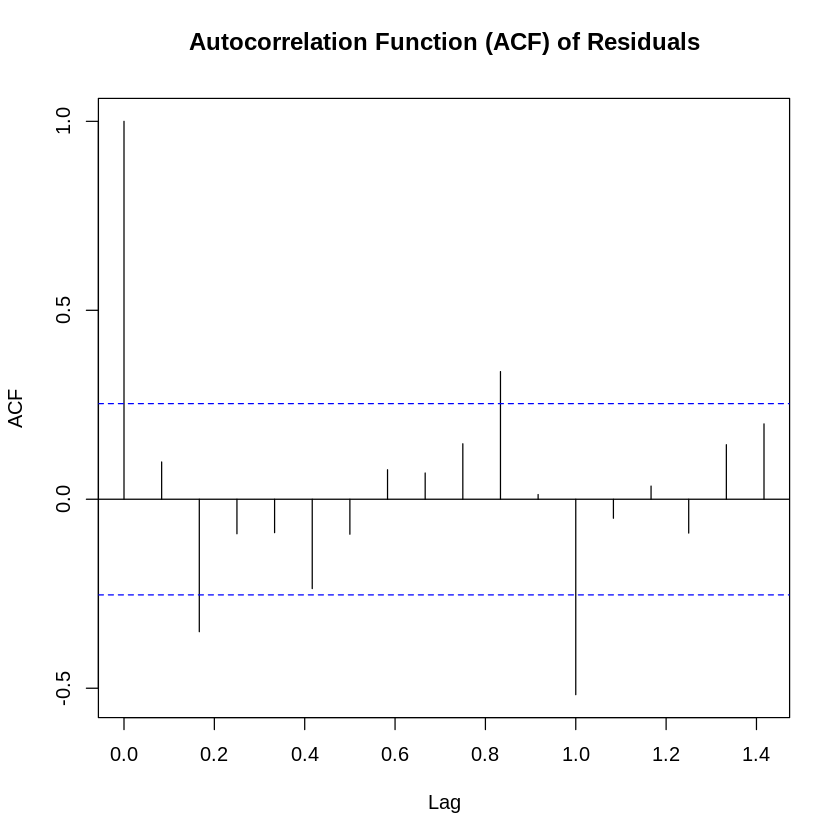

In [7]:
# Remove missing values from the residuals
residual <- na.omit(residual)

# Plot the autocorrelation function of the residuals
acf(residual, main = "Autocorrelation Function (ACF) of Residuals")

From the autocorrelation plot we see that there is some significant autocorrelation for some lags, suggesting the residuals are not a sample of IID noise. To confirm this, we can also perform a Ljung-Box test for the residual autocorrelation

In [8]:
# Ljung-Box test for residual autocorrelation
Box.test(residual, lag = 20, type = "Ljung-Box")


	Box-Ljung test

data:  residual
X-squared = 52.152, df = 20, p-value = 0.0001082


The low p-value obtained from the test suggests that indeed the residuals are not a sample of IID noise

## 1.2 Simulate a Gaussian white noise of n = 10.000 data. Verify by testing that it is an IID noise and a Gaussian white noise. Simulate a Gaussian Random Walk. Simulate IID noises of 10.000 data that are not a Gaussian white noise: a Poisson noise and an exponential noise. Test their properties.

In [9]:
# Install and load ggplot2 for visualization purposes
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Here we simply loaded the library ggplot2 for visualization purposes. More information about its use can be found [here](https://cran.r-project.org/web/packages/ggplot2/ggplot2.pdf)

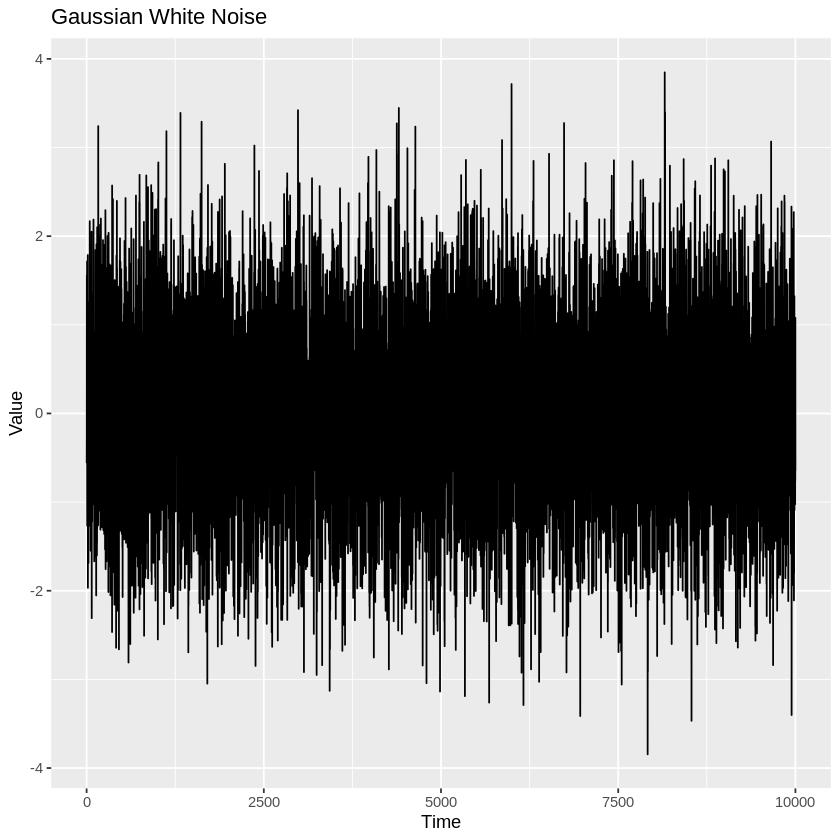

In [10]:
# Simulate Gaussian white noise
set.seed(123)
n <- 10000
gaussian_white_noise <- rnorm(n)

# Plot the Guassian white noise series
ggplot() +
  geom_line(aes(x = 1:n, y = gaussian_white_noise)) +
  labs(x = "Time", y = "Value", title = "Gaussian White Noise")

To test that it is an IID noise we can perform an autocorrelation test (by looking at the autocorrelation value at different lags) and a Ljung-Box test


Autocorrelations of series ‘gaussian_white_noise’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.016  0.003 -0.002  0.001  0.009 -0.006 -0.007 -0.011 -0.002  0.002 
    11     12     13     14     15     16     17     18     19     20     21 
 0.007 -0.014 -0.002  0.008 -0.011  0.006 -0.010 -0.002 -0.005  0.013  0.008 
    22     23     24     25     26     27     28     29     30     31     32 
 0.003 -0.004 -0.014 -0.008 -0.016  0.002  0.011 -0.013  0.014 -0.012  0.026 
    33     34     35     36     37     38     39     40 
 0.008  0.008  0.000  0.005 -0.005  0.002  0.003 -0.017 

	Box-Ljung test

data:  gaussian_white_noise
X-squared = 5.6504, df = 10, p-value = 0.8437



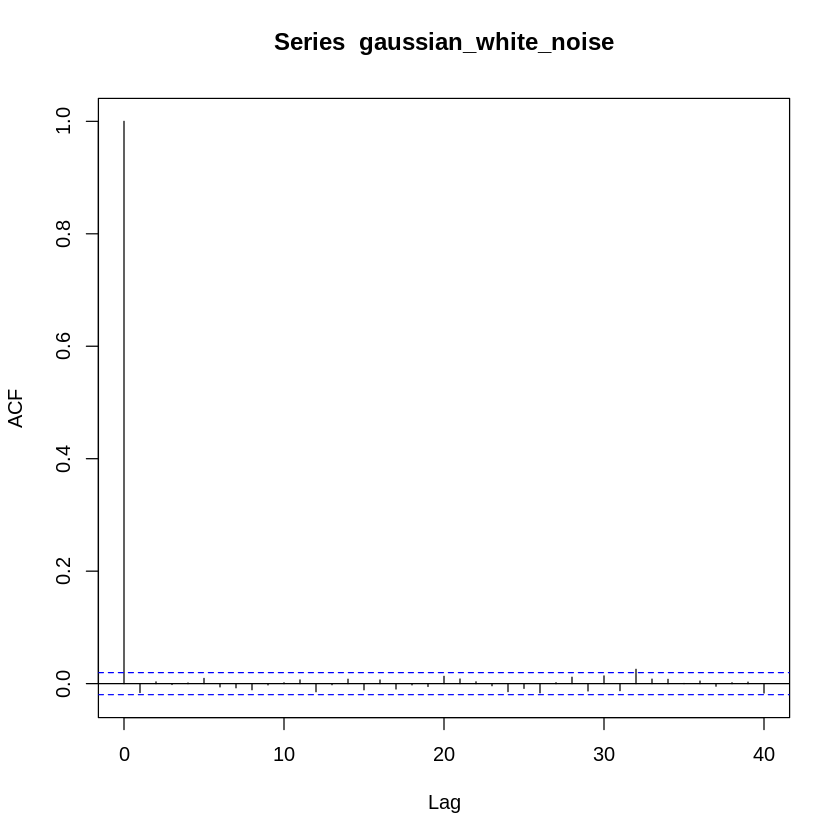

In [11]:
# Autocorrelation test
acf_result <- acf(gaussian_white_noise)
print(acf_result)

# Ljung-Box test
ljung_box_result <- Box.test(gaussian_white_noise, lag = 10, type = "Ljung-Box")
print(ljung_box_result)

We can observe that the autocorrelation is low for all lags, (apart for its value for lag=0, as expected) suggesting that the noise is independent. Furthermore, the Box-Ljiung test returns a p-value of 0.8437, suggesting there is no statistical significance to reject the null hypothesis of no serial correlation, and indicating that the noise is IID. </br>
To verify the noise is a Gaussian noise we can perform a Shapiro-Wilk test

In [12]:
# Perform Shapiro-Wilk test on a subset of data
subset_data <- sample(gaussian_white_noise, 5000)
shapiro_test <- shapiro.test(subset_data)
print(shapiro_test)


	Shapiro-Wilk normality test

data:  subset_data
W = 0.99976, p-value = 0.8592



The high p-value suggests there is no statistical significance to reject the null hypothesis of the normality of the noise data. (in this case we perform the test on a subset of the noise data because the Shapiro-Wilk test used here has a limitation of 5000 samples) </br>
To simulate a Gaussian Random Walk we can do the following:

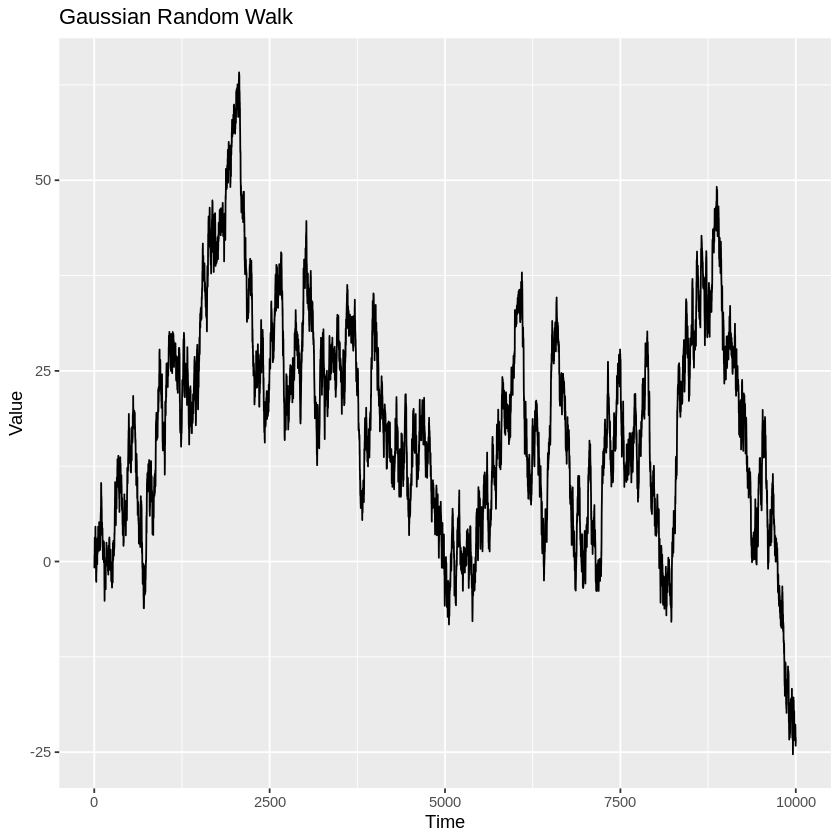

In [13]:
# Simulate Gaussian random walk
gaussian_random_walk <- cumsum(gaussian_white_noise)

# Plot the time series
ggplot() +
  geom_line(aes(x = 1:n, y = gaussian_random_walk)) +
  labs(x = "Time", y = "Value", title = "Gaussian Random Walk")

To simulate IID noise that is not Gaussian, such as Poisson noise and Exponential noise, we can do the following:

[1] 4.9507
[1] 4.979167


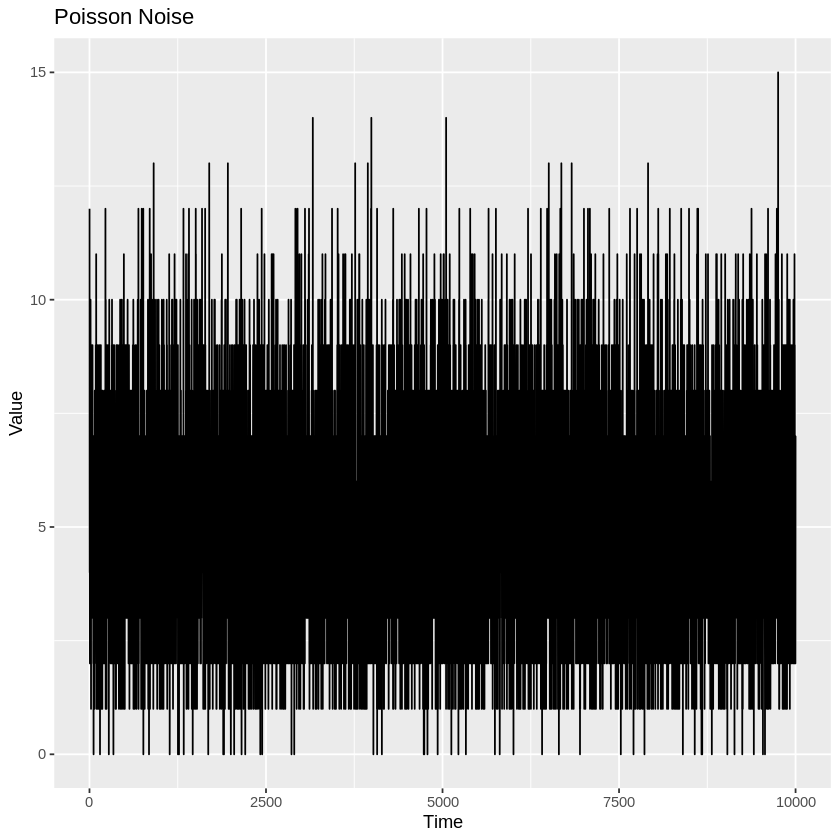

In [14]:
# Simulate Poisson noise
poisson_noise <- rpois(n, lambda = 5) 

# Plot the time series
ggplot() +
  geom_line(aes(x = 1:n, y = poisson_noise)) +
  labs(x = "Time", y = "Value", title = "Poisson Noise")

# Test properties of Poisson noise
mean_value <- mean(poisson_noise)
variance <- var(poisson_noise)

print(mean_value)
print(variance)

[1] 5.012561
[1] 24.93845


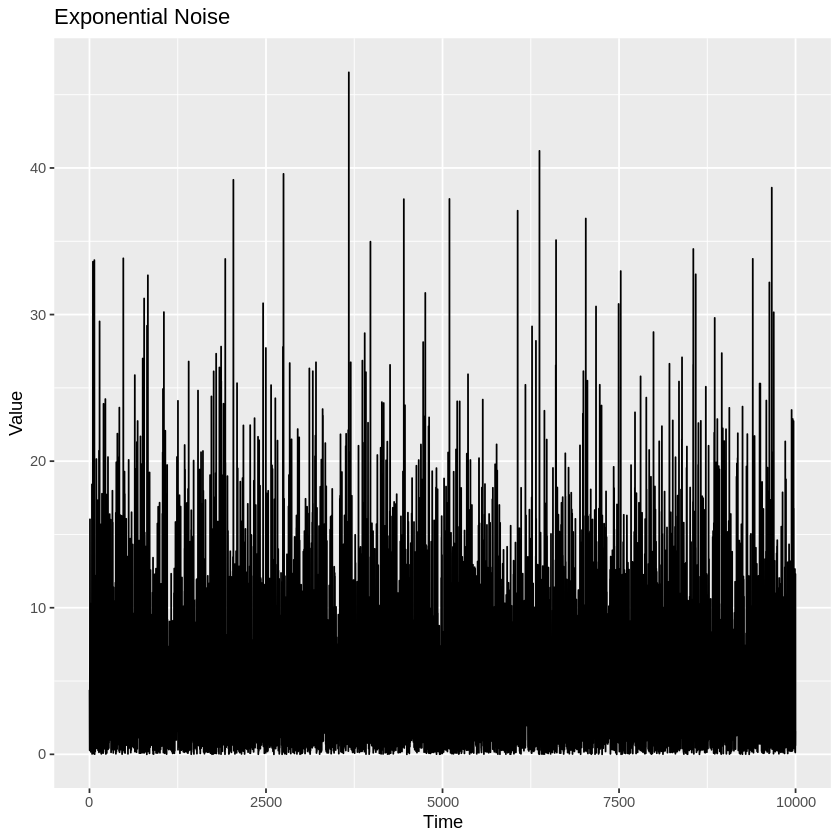

In [15]:
# Simulate exponential noise
exponential_noise <- rexp(n, rate = 0.2)  

# Plot the time series
ggplot() +
  geom_line(aes(x = 1:n, y = exponential_noise)) +
  labs(x = "Time", y = "Value", title = "Exponential Noise")

# Test properties of exponential noise
mean_value <- mean(exponential_noise)
variance <- var(exponential_noise)

print(mean_value)
print(variance)

## 1.3 Simulate an AR(p) model with 10000 data, for p=1 and p=2. Fit the best model to the data in both cases. Validate the model by showing the residuals are an IID noise.

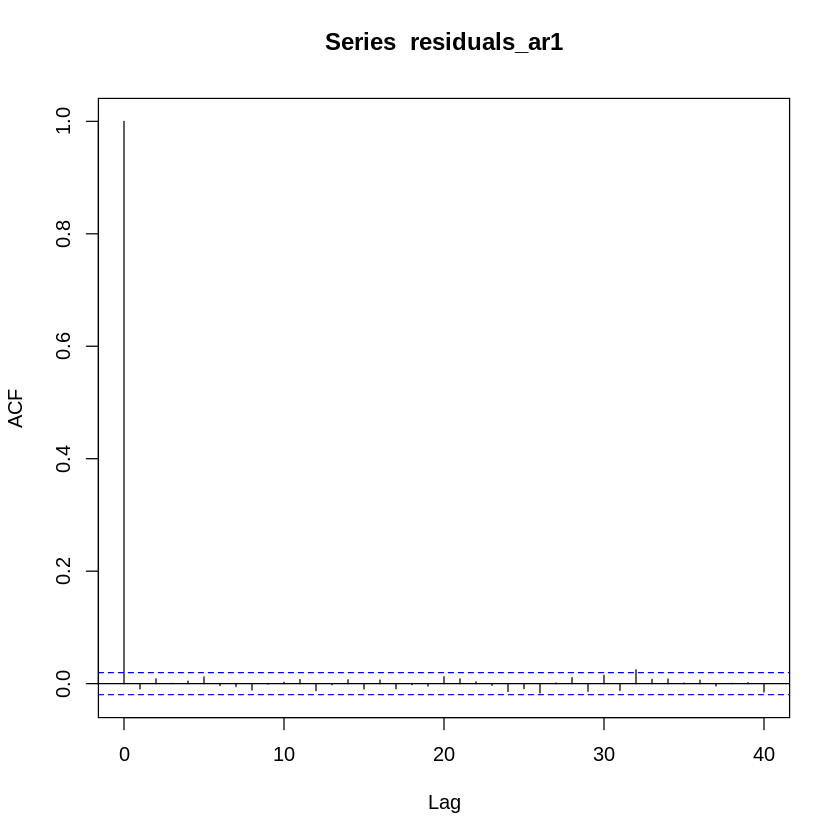

In [22]:
# Simulate AR(1) model
set.seed(123)  
p1 <- arima.sim(list(order = c(1, 0, 0), ar = 0.8), n = 10000)

# Fit the best model
fit_ar1 <- arima(p1, order = c(1, 0, 0)) 

# Validate the model
residuals_ar1 <- residuals(fit_ar1)
acf(residuals_ar1)  # Autocorrelation plot

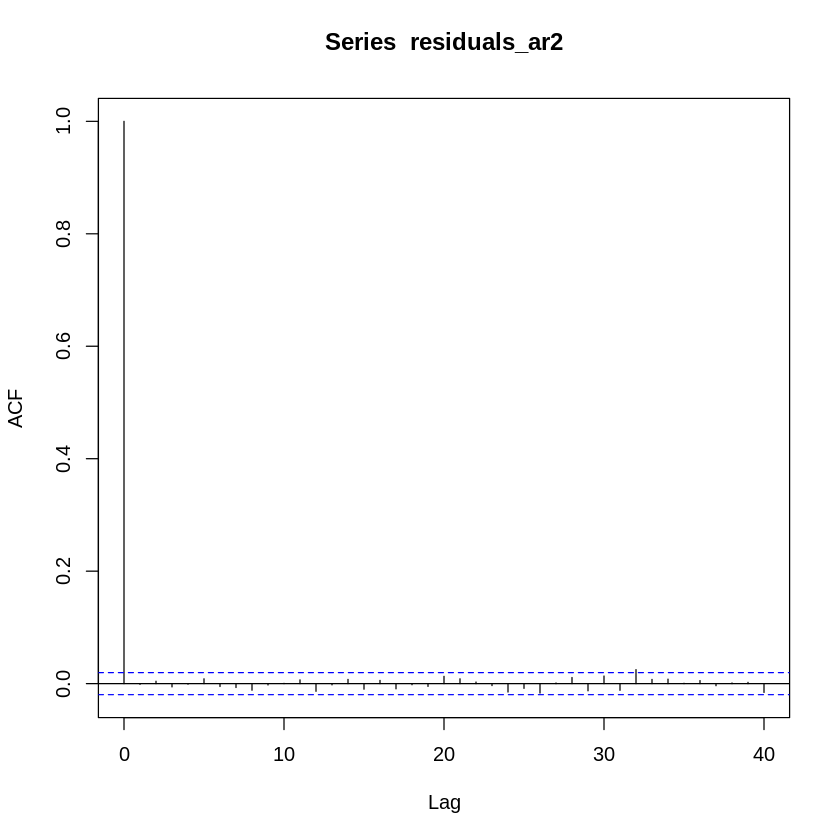

In [24]:
# Simulate AR(2) model
set.seed(123)  
p2 <- arima.sim(list(order = c(2, 0, 0), ar = c(0.6, -0.3)), n = 10000)

# Fit the best model
fit_ar2 <- arima(p2, order = c(2, 0, 0)) 

# Validate the model
residuals_ar2 <- residuals(fit_ar2)
acf(residuals_ar2)  # Autocorrelation plot

In both cases we can observe that the residuals show no significant autocorrelation, suggesting that the models are adequately capturing the temporal dependencies in the data.

## 1.4 Simulate an ARMA (2,1). Compute the autocorrelation and the partial autocorrelation. Find the parameters that best fit the ARMA model. Validate it. Characterize the forecasting with the proper graphs.

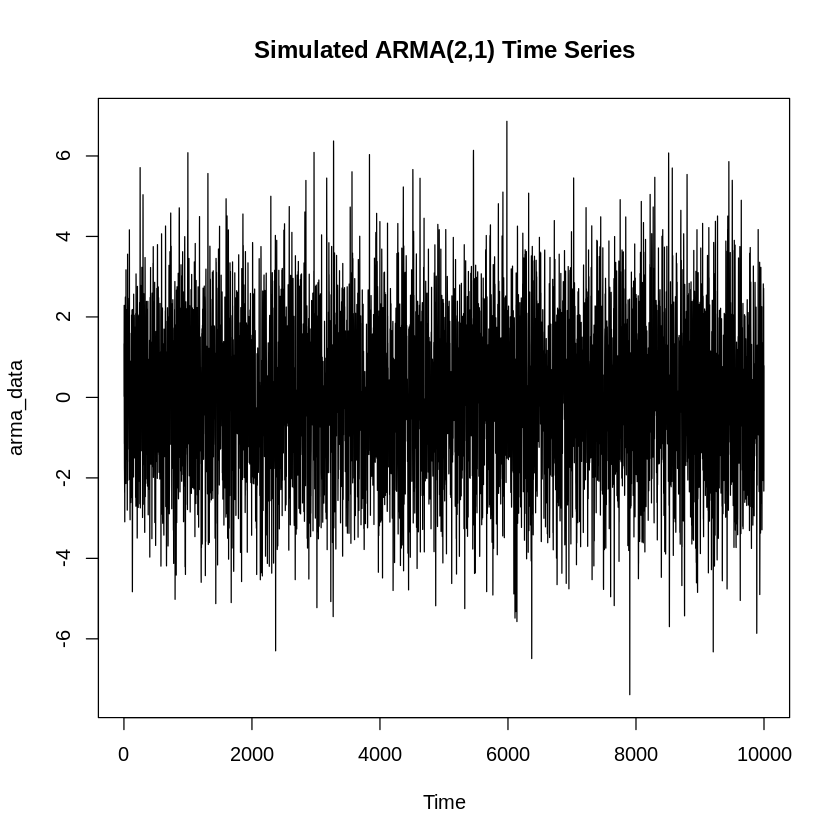

In [30]:
# Simulate ARMA(2,1) model
set.seed(123)  
arma_data <- arima.sim(list(order = c(2, 0, 1), ar = c(0.8, -0.3), ma = 0.5), n = 10000)

# Plot the simulated time series
plot(arma_data, type = 'l', main = 'Simulated ARMA(2,1) Time Series') 

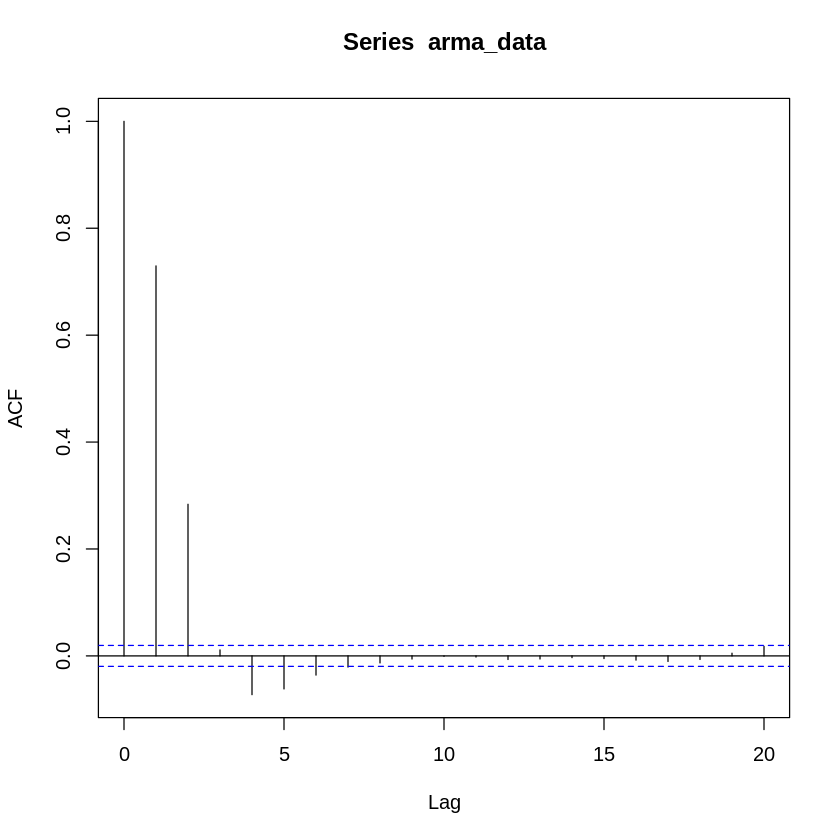

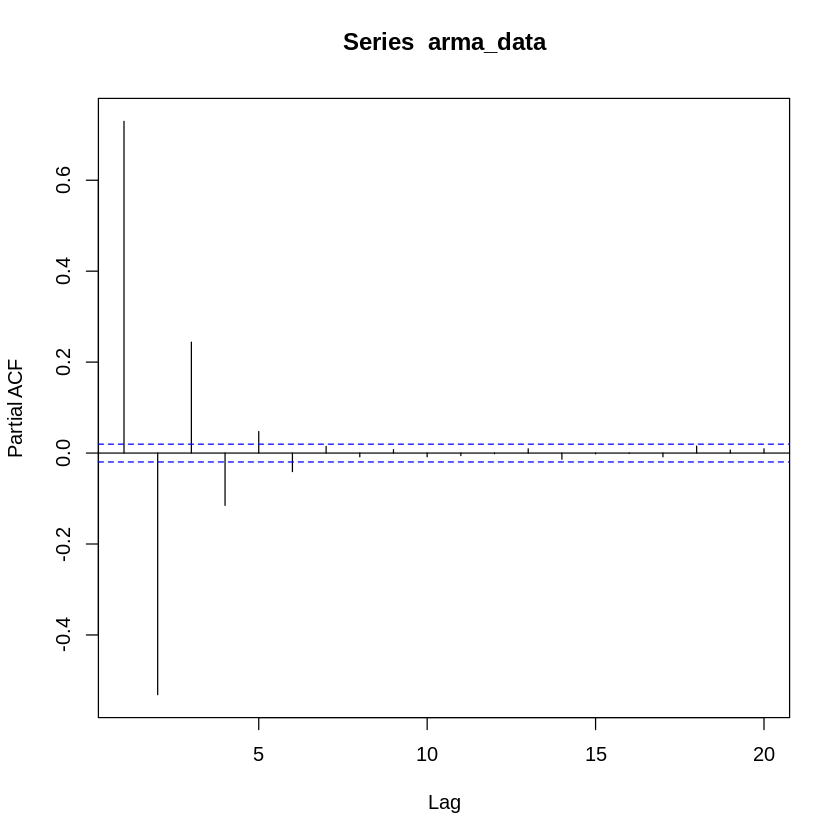

In [31]:
# Compute autocorrelation and partial autocorrelation
acf_values <- acf(arma_data, lag.max = 20)  
pacf_values <- pacf(arma_data, lag.max = 20) 

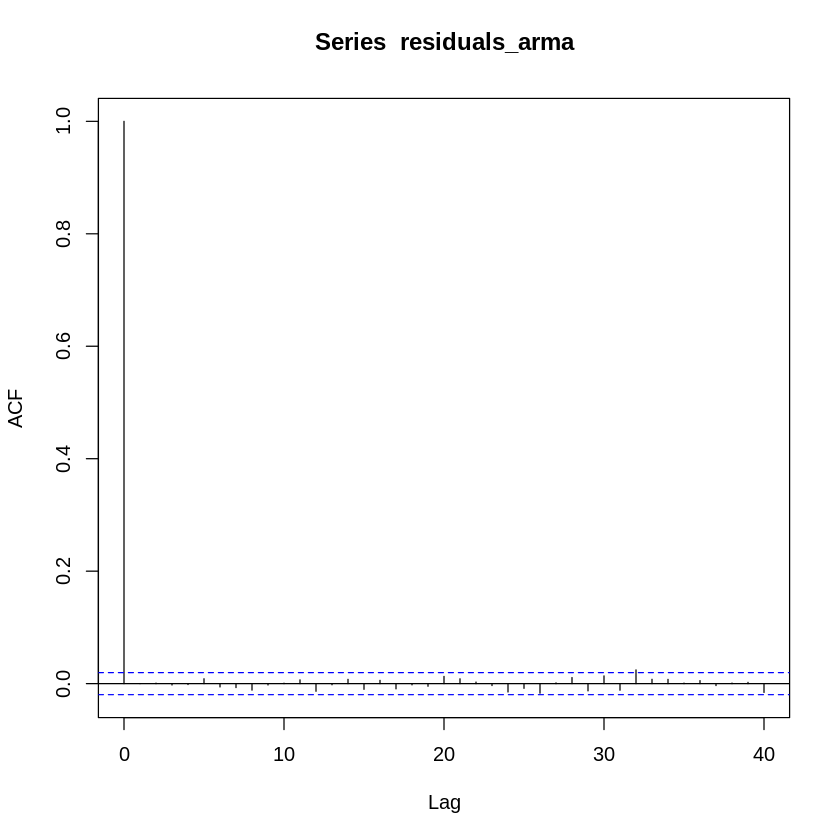

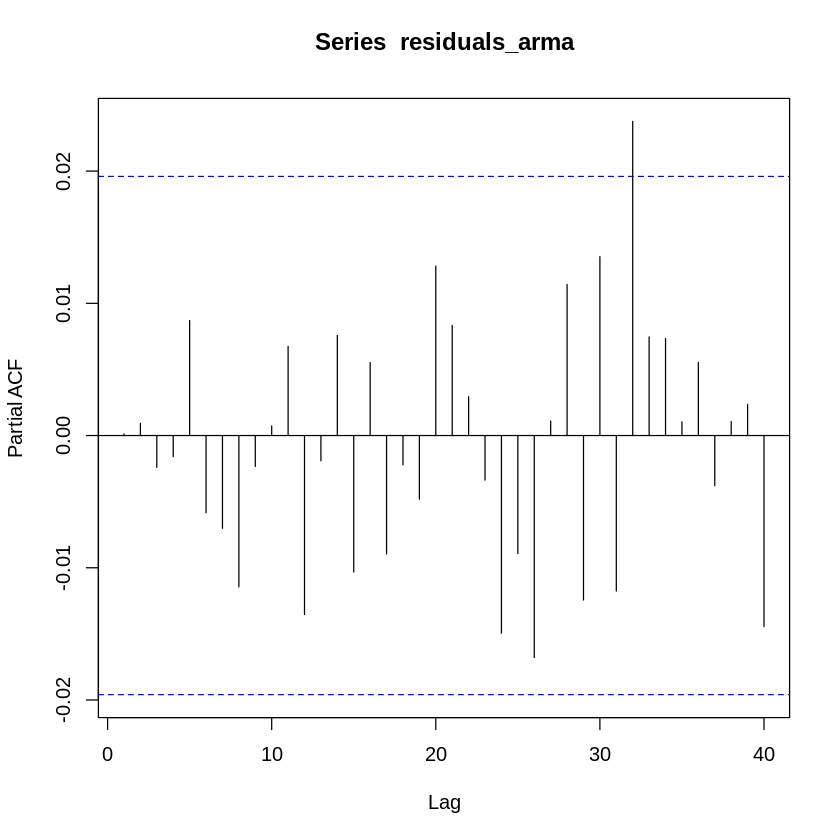

In [32]:
# Find parameters that best fit the ARMA model
fit_arma <- arima(arma_data, order = c(2, 0, 1))  

# Validate the model
residuals_arma <- residuals(fit_arma)
acf(residuals_arma)  # Autocorrelation plot of residuals
pacf(residuals_arma)  # Partial autocorrelation plot of residuals

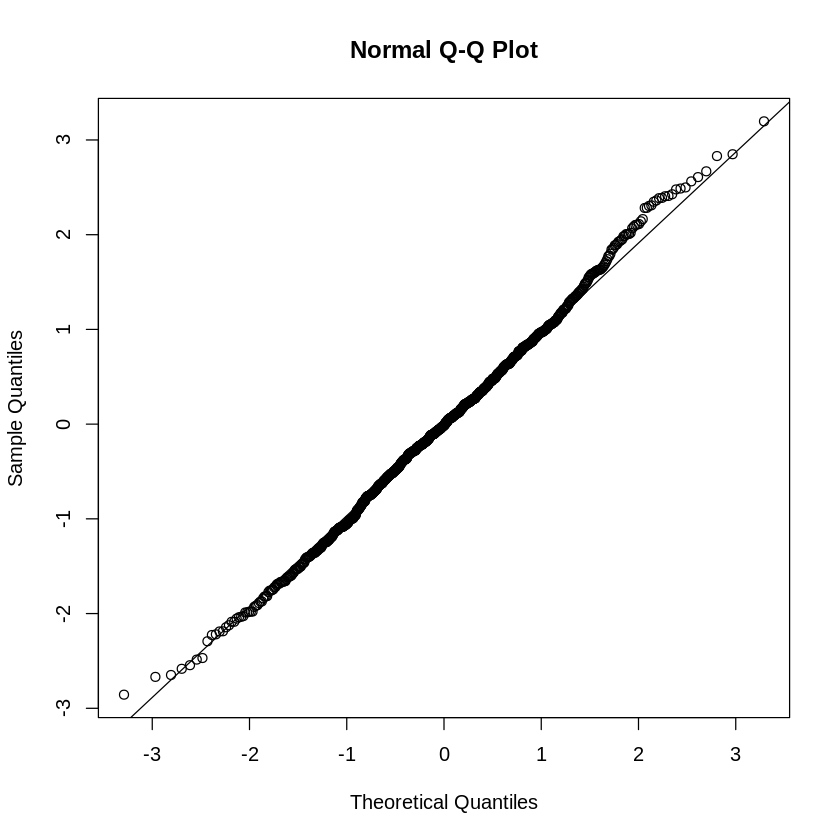

In [34]:
# QQ Plot
qqnorm(arma_model$residuals)
qqline(arma_model$residuals)

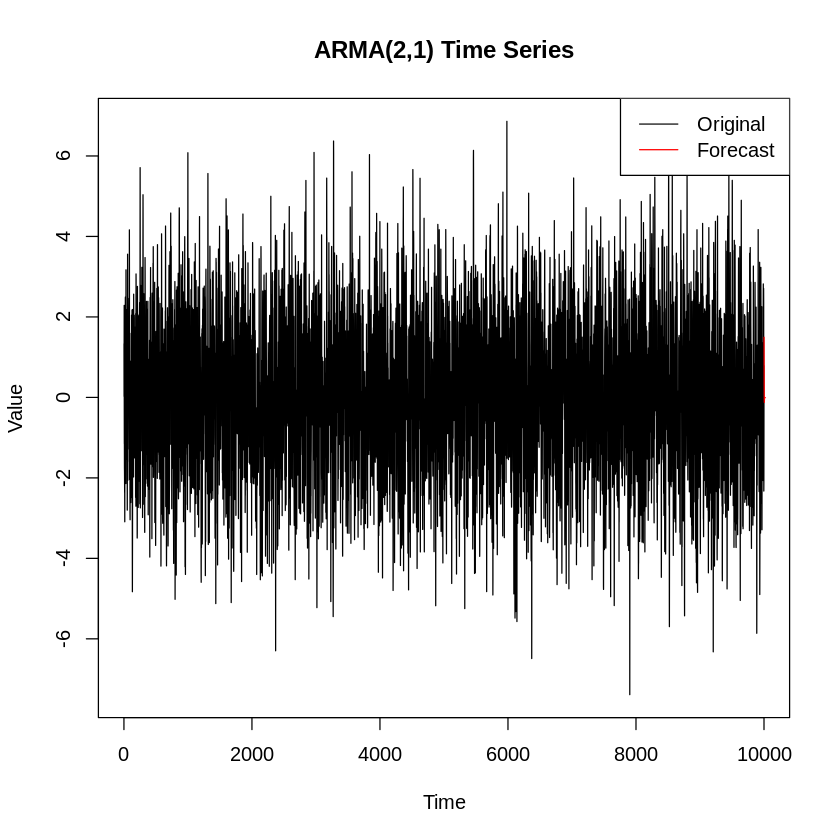

In [35]:
# Characterize forecasting with simulated values
forecast_values <- predict(fit_arma, n.ahead = 20)$pred  
time <- 1:length(arma_data)
future_time <- length(arma_data) + 1:length(forecast_values)
plot(time, arma_data, type = "l", xlab = "Time", ylab = "Value", main = "ARMA(2,1) Time Series")
lines(future_time, forecast_values, col = "red")
legend("topright", legend = c("Original", "Forecast"), col = c("black", "red"), lty = 1)

## 1.5 Load the file Nile in dataset. Prepare the graphical representation. Make the first differences. Fit the best ARMA model to the process of first differences. Validate it. Make the graphical representation of the forecasting.

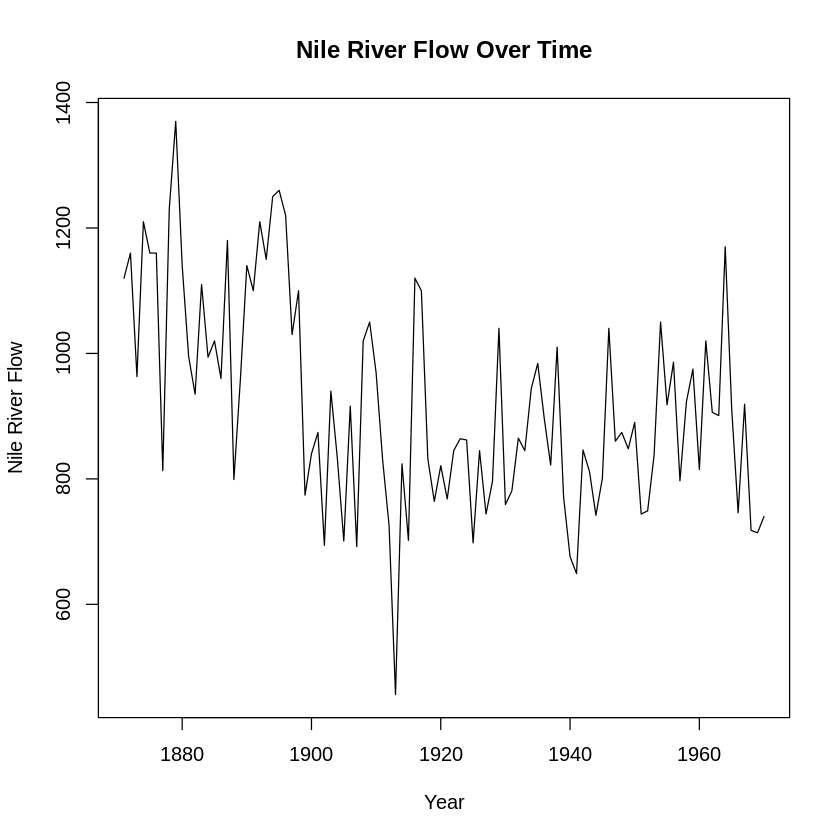

In [36]:
# Load the Nile dataset
data(Nile)

# Plot graphical representation of the Nile dataset
plot(Nile, type = "l", xlab = "Year", ylab = "Nile River Flow", main = "Nile River Flow Over Time")

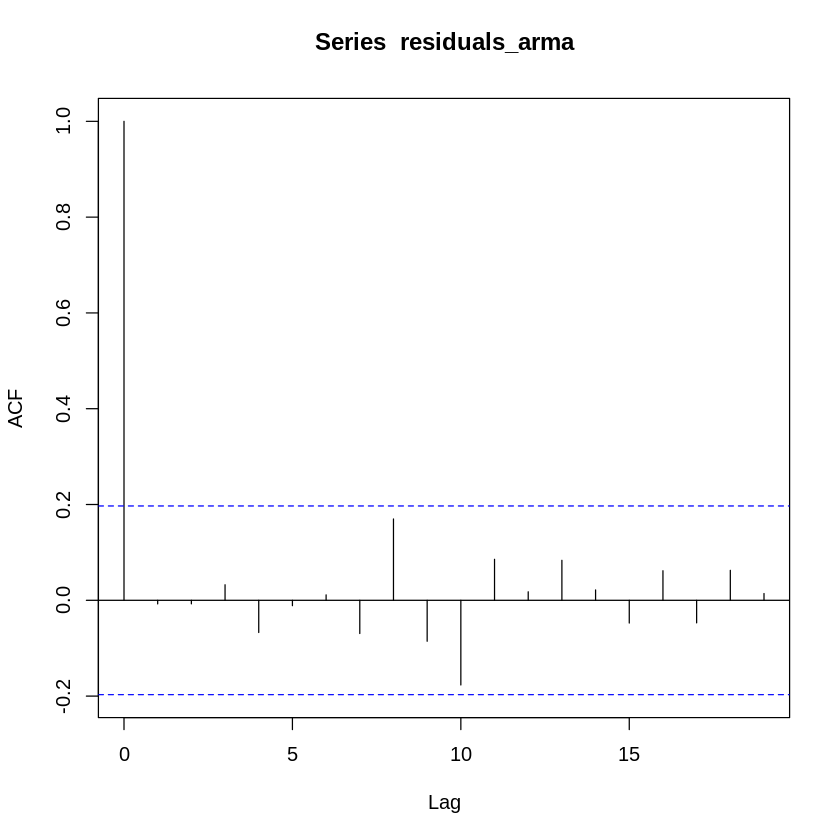

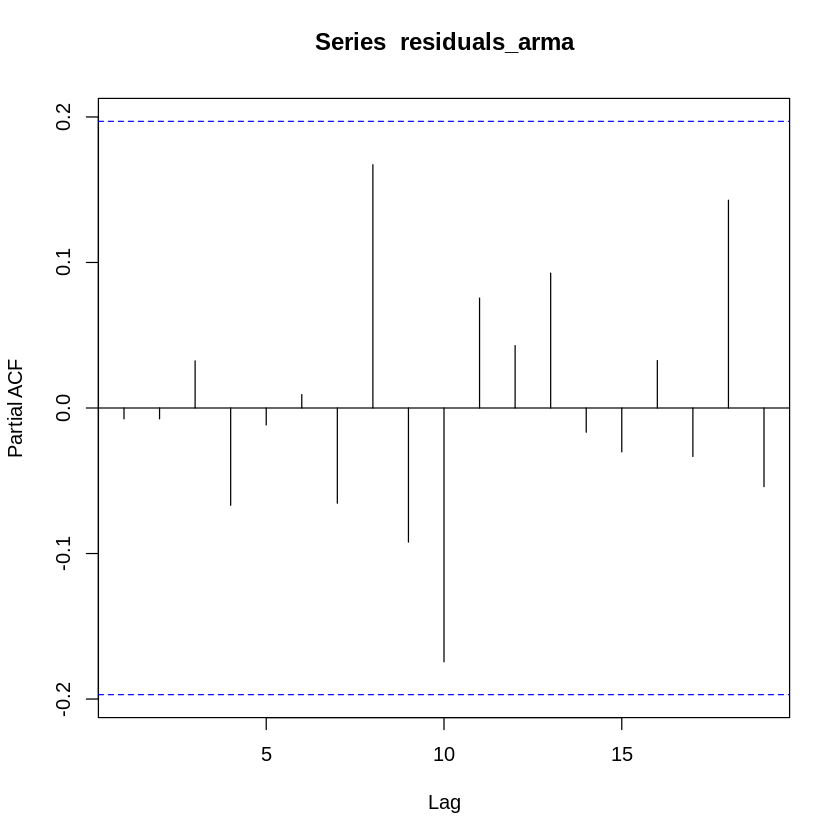

In [37]:
# Compute the first differences
nile_diff <- diff(Nile)
time <- 1871:1970  # Adjust the time period based on the available data

# Fit the best ARMA model to the first differences
fit_arma <- arima(nile_diff, order = c(2, 0, 1))  # Adjust order as per your requirements

# Validate the model
residuals_arma <- residuals(fit_arma)
acf(residuals_arma)  # Autocorrelation plot of residuals
pacf(residuals_arma)  # Partial autocorrelation plot of residuals

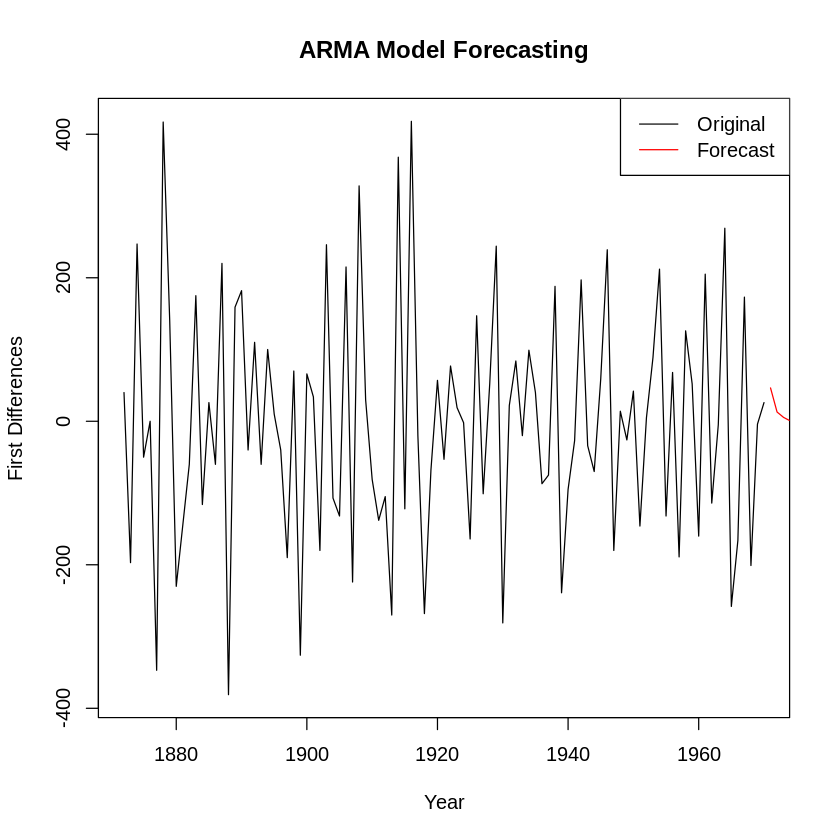

In [38]:
# Graphical representation of the forecasting
forecast_values <- predict(fit_arma, n.ahead = 10)$pred  # Adjust n.ahead as desired for forecasting horizon
future_time <- 1971:1980  # Adjust the future time period based on the forecasting horizon
plot(time[-1], nile_diff, type = "l", xlab = "Year", ylab = "First Differences", main = "ARMA Model Forecasting")
lines(future_time, forecast_values, col = "red")
legend("topright", legend = c("Original", "Forecast"), col = c("black", "red"), lty = 1)

# 2. Long-Memory and Volatile Time Series Models

## 2.1 Simulate a FARIMA time series. Fit it the best model and test that the residuals of the fitted model are a white noise

In [39]:
# Install and load the 'forecast' package
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



For this we are using the forecast library. The reference manual can be found [here](https://cran.r-project.org/web/packages/forecast/forecast.pdf)

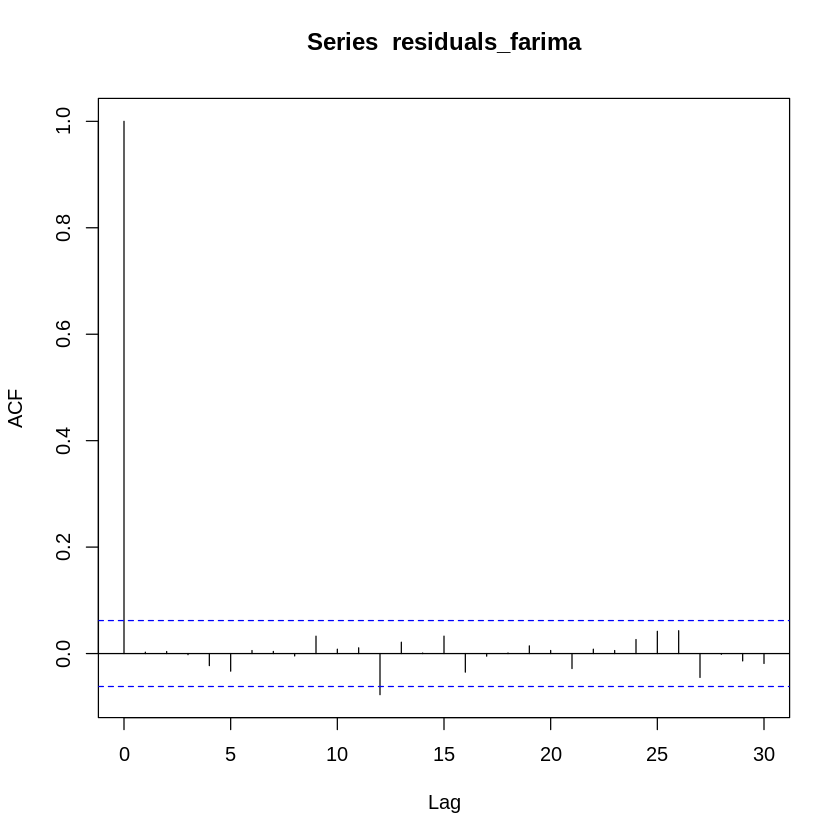


	Box-Ljung test

data:  residuals_farima
X-squared = 12.093, df = 20, p-value = 0.9128


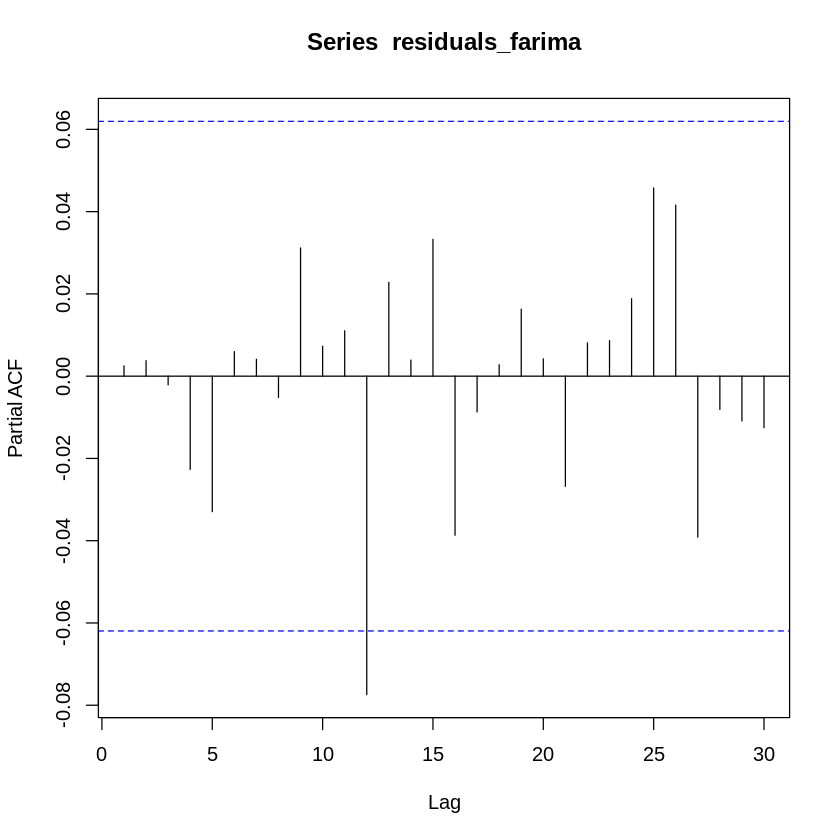

In [40]:
# Simulate a FARIMA time series
set.seed(123)  # Set seed for reproducibility
farima_data <- arima.sim(list(order = c(2, 1, 1), ar = c(0.7, -0.2), ma = 0.5, sar = 0.3, diff = 0.7), n = 1000)

# Fit the best FARIMA model
fit_farima <- auto.arima(farima_data)

# Test the residuals of the fitted model
residuals_farima <- residuals(fit_farima)
acf(residuals_farima)  # Autocorrelation plot of residuals
pacf(residuals_farima)  # Partial autocorrelation plot of residuals
Box.test(residuals_farima, type = "Ljung-Box", lag = 20)  # Ljung-Box test for white noise

In [55]:
# Assuming you have fitted a model and obtained the residuals 'residuals_farima'

# Mean Test
mean_test <- t.test(residuals_farima, mu = 0)
print(mean_test)

# Variance Test
variance <- var(residuals_farima)
print(variance)


	One Sample t-test

data:  residuals_farima
t = 0.54983, df = 1000, p-value = 0.5826
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.04456397  0.07925764
sample estimates:
 mean of x 
0.01734684 

[1] 0.9963659


In [56]:
# Normality test (Shapiro-Wilk test)
normality_test <- shapiro.test(residuals_farima)
print(normality_test)


	Shapiro-Wilk normality test

data:  residuals_farima
W = 0.99823, p-value = 0.3908



The residuals seem to be contained and with mean zero and constant variance. Furthermore, the Ljung-Box test suggests that the residuals are indeed IID. Finally, the Shapiro-Wilk test has a p-value of 0.3908, suggesting the residual are a Gaussian White noise

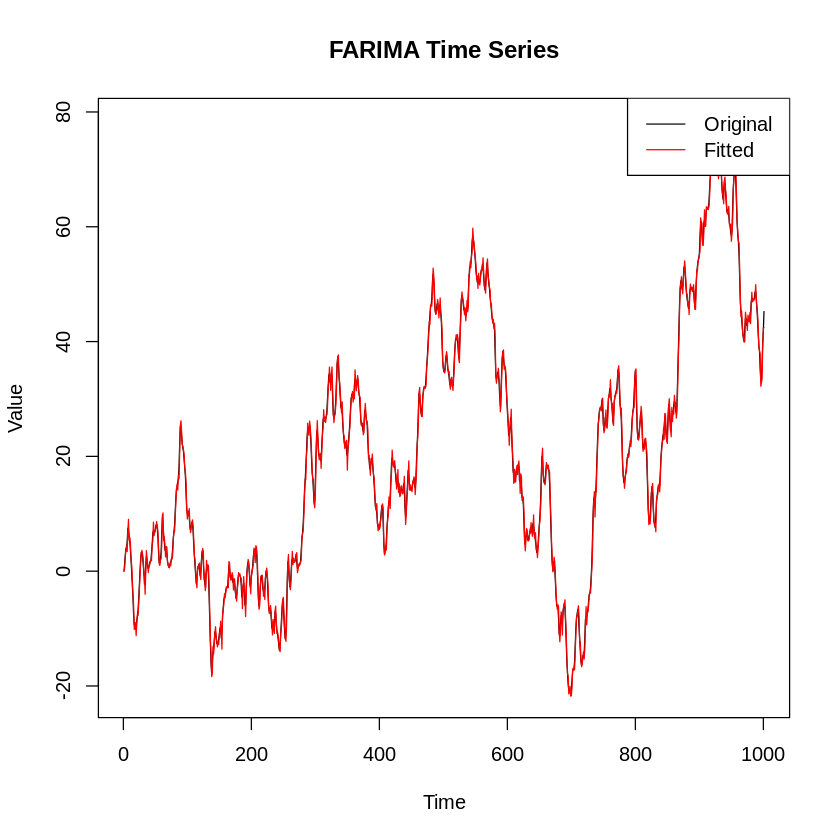

In [41]:
# Plot the time series and fitted values
time <- 1:length(farima_data)
plot(time, farima_data, type = "l", xlab = "Time", ylab = "Value", main = "FARIMA Time Series")
lines(time, fitted(fit_farima), col = "red")
legend("topright", legend = c("Original", "Fitted"), col = c("black", "red"), lty = 1)

Visualizing the fitted data, we can see the model is approximating it well

## 2.2 Fit a FARIMA model to Nile data in datasets. Check that the fitted model is a good model.

In [57]:
# Load the Nile dataset
data(Nile)

# Fit a FARIMA model to the Nile data
fit_farima <- auto.arima(Nile)

# Check the goodness of fit
summary(fit_farima)

Series: Nile 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.2544  -0.8741
s.e.  0.1194   0.0605

sigma^2 = 20177:  log likelihood = -630.63
AIC=1267.25   AICc=1267.51   BIC=1275.04

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE
Training set -16.06603 139.8986 109.9998 -4.005967 12.78745 0.825499
                    ACF1
Training set -0.03228482

In order to see if the model is a good model we can perfom some tests and oobserve some indicators

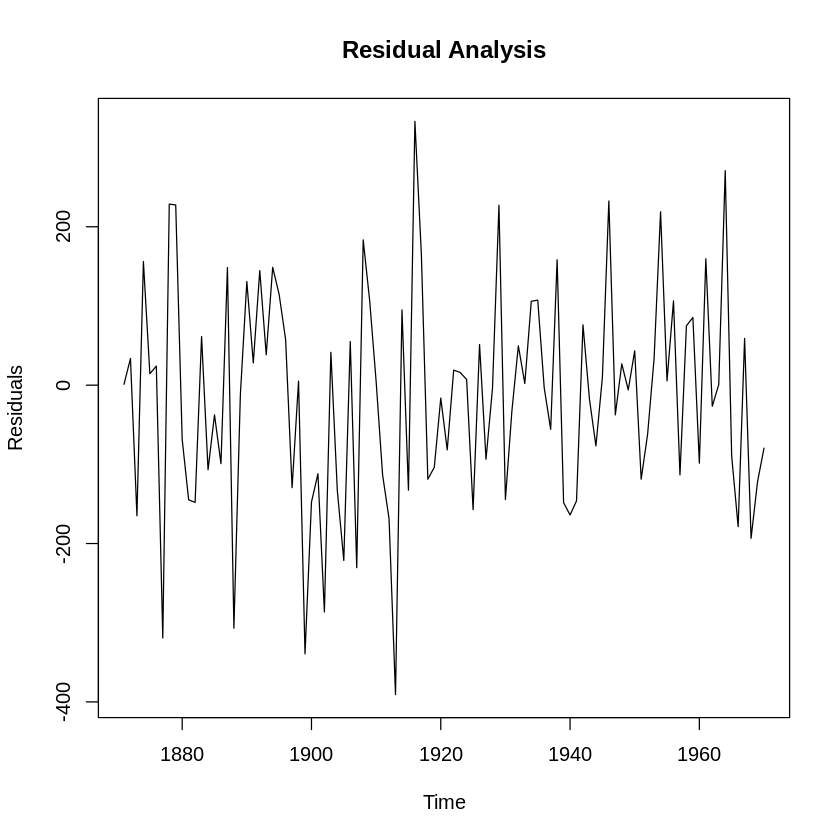


	Box-Ljung test

data:  residuals
X-squared = 12.861, df = 20, p-value = 0.8832


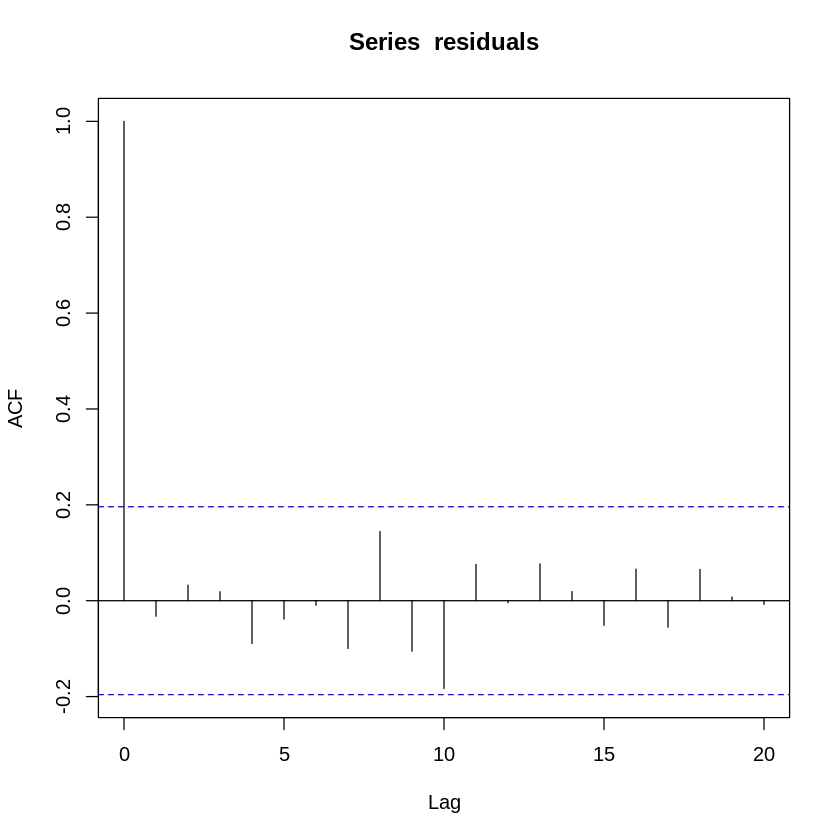


	Shapiro-Wilk normality test

data:  residuals
W = 0.99083, p-value = 0.7312


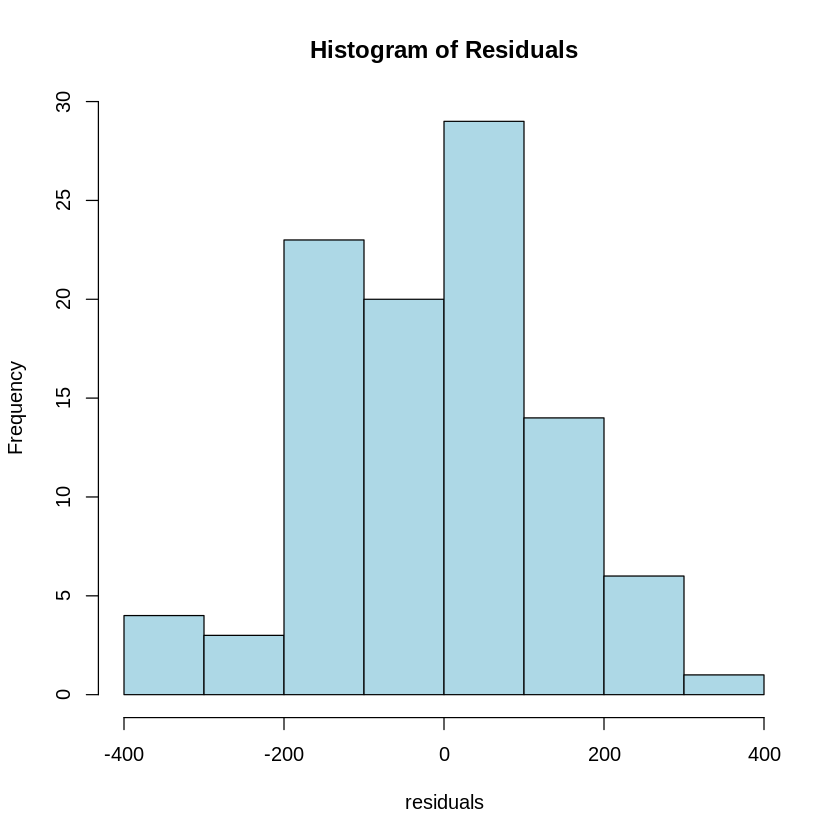

In [59]:
# Obtain the residuals
residuals <- residuals(fit_farima)

# Plot the residuals
plot(residuals, type = "l", xlab = "Time", ylab = "Residuals", main = "Residual Analysis")

# Autocorrelation plot
acf(residuals, lag.max = 20)

# Ljung-Box test
Box.test(residuals, lag = 20, type = "Ljung-Box")

# Histogram and normality tests
hist(residuals, breaks = "FD", col = "lightblue", main = "Histogram of Residuals")
shapiro.test(residuals)

The model seems to be approximating well the data. The residuals look contained, the Box-Ljung test as well as the Shapiro-Wilk test give high p-values, confirming Gaussianity and IID, and, finally, the histogram of the residuals seems to be coherent with the other results.

## 2.3 Simulate a GARCH(1,1) time series. Fit the best model to this series. Check that the fitted model it is a good model.

In [ ]:
# Install and load the fGarch package
install.packages("fGarch")
library(fGarch)

Inside the fGarch library we can use the garchFit function to fit the best model to the series. The documentation of this library describing this functions in detail an be found [here](https://cran.r-project.org/web/packages/fGarch/fGarch.pdf)

In [49]:
# Simulate GARCH(1,1) time series
set.seed(123)
garch_model <- garchSim(spec = garchSpec(model = list(order = c(1, 1))), n = 1000)

# Fit the GARCH(1,1) model
fit <- garchFit(formula = ~garch(1, 1), data = garch_model)


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          1000
 Recursion Init:            mci
 Series Scale:              0.003133171

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V     params includes
    mu     -0.26021815   0.2602182 0.02602182     TRUE
    omega   0.00000100 100.0000000 0.10000000     TRUE
    alpha1  0.00000001   1.0000000 0.10000000     TRUE
    gamma1 -0.99999999   1.0000000 0.10000000    FALSE
    beta1   0.00000001   1.0000000 0.8

To assess the goodness of this model we can perform residual analysis

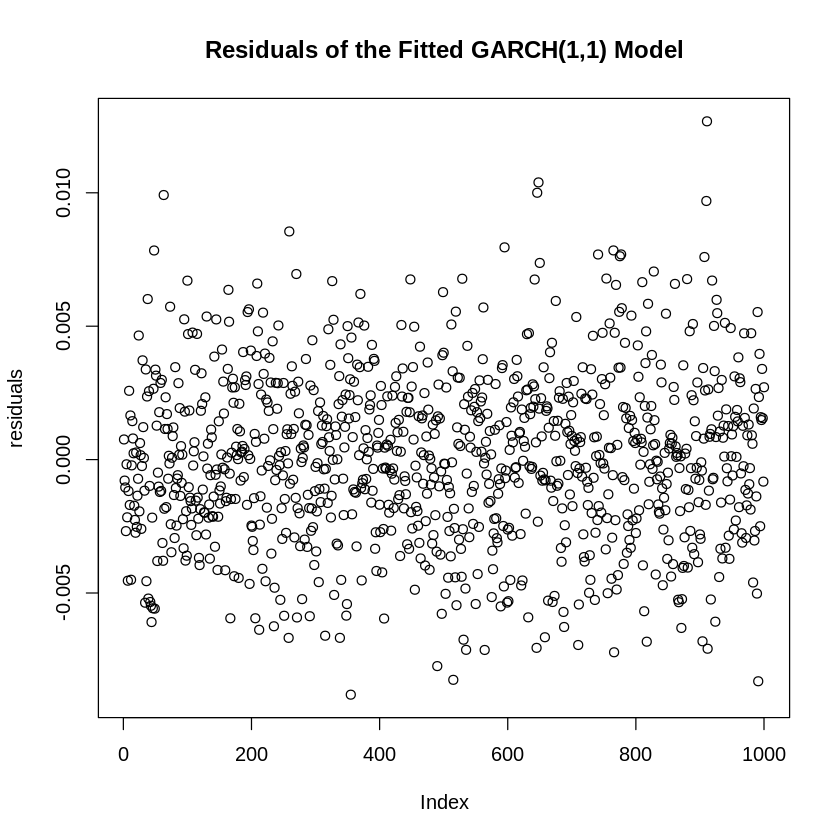

In [50]:
# Obtain the residuals from the fitted model
residuals <- residuals(fit)

# Plot the residuals
plot(residuals, main = "Residuals of the Fitted GARCH(1,1) Model")

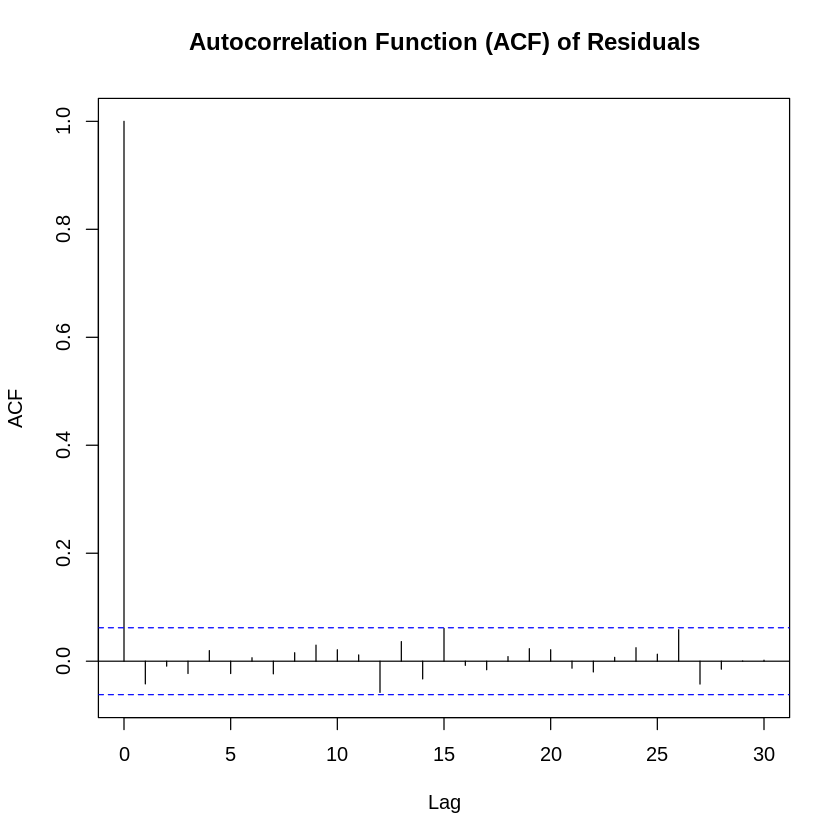

In [52]:
# Autocorrelation plot of the residuals
acf(residuals, main = "Autocorrelation Function (ACF) of Residuals")

As we can see, the autocorrelation of the residuals is contained, suggestng they are IID. Furthermore, the summary of the model can give use more insights of how good it is representing the data

In [51]:
# Summary of the fitted model
summary(fit)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = garch_model) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x55a2a60e0b18>
 [data = garch_model]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1       beta1  
4.9842e-05  2.6840e-06  9.9643e-02  6.2617e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)   
mu     4.984e-05   9.506e-05    0.524  0.60004   
omega  2.684e-06   1.726e-06    1.555  0.12001   
alpha1 9.964e-02   3.984e-02    2.501  0.01239 * 
beta1  6.262e-01   2.047e-01    3.059  0.00222 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 4357.748    normalized:  4.357748 

Description:
 Sun May 28 09:47:06 2023 by user:  


Standardised Residuals Tests:
                                Statistic p-Value  
 Jarque-Bera Test   R    Chi^2  1.301205  0.5217313
 Shapiro-Wilk Test  R    W      0.9980621 0.3096205
 Lj

From this summary we can retrieve a lot of information. For example, we have the results of different Standardised Residual Tests, all suggesting the residuals are in fact, as we were expecting, Guassian IID noise. Also, some Information Criterion Statistics, like the AIC (Akaike Information Criterion) and the BIC (Bayesian Information Criterion), can inform us of the goodness of fit of the model. For these statistics we obtain low values, suggesting the model is well approximating the data without being too complex and overfitting

## 2.4 Fit a GARCH model to the logarithmic transformation of series in EuStockMarkets of datasets. Check the stylised facts (un-correlation, correlation of the squares, heavy tails, volatility clustering). Check that the fitted model is a good model.

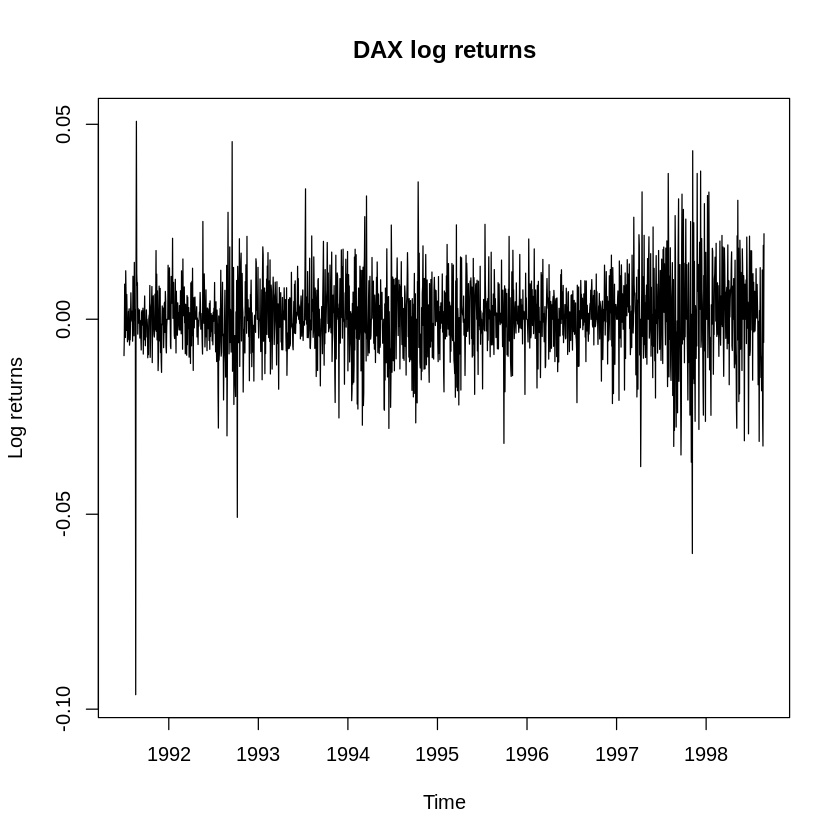

In [75]:
# Load the necessary package
library(fGarch)

# Load the required dataset
data(EuStockMarkets)

# Extract the "DAX" series from the EuStockMarkets dataset
dax_returns <- diff(log(EuStockMarkets[, "DAX"]))

# Create a time series plot of the DAX series
plot(dax_returns, main = "DAX log returns", ylab = "Log returns")

In [76]:
# Fit the GARCH model to the "DAX" series
garch_model <- garchFit(~ garch(1, 1), data = dax_returns)


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          1859
 Recursion Init:            mci
 Series Scale:              0.01030084

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V     params includes
    mu     -0.63299883   0.6329988 0.06329988     TRUE
    omega   0.00000100 100.0000000 0.10000000     TRUE
    alpha1  0.00000001   1.0000000 0.10000000     TRUE
    gamma1 -0.99999999   1.0000000 0.10000000    FALSE
    beta1   0.00000001   1.0000000 0.80

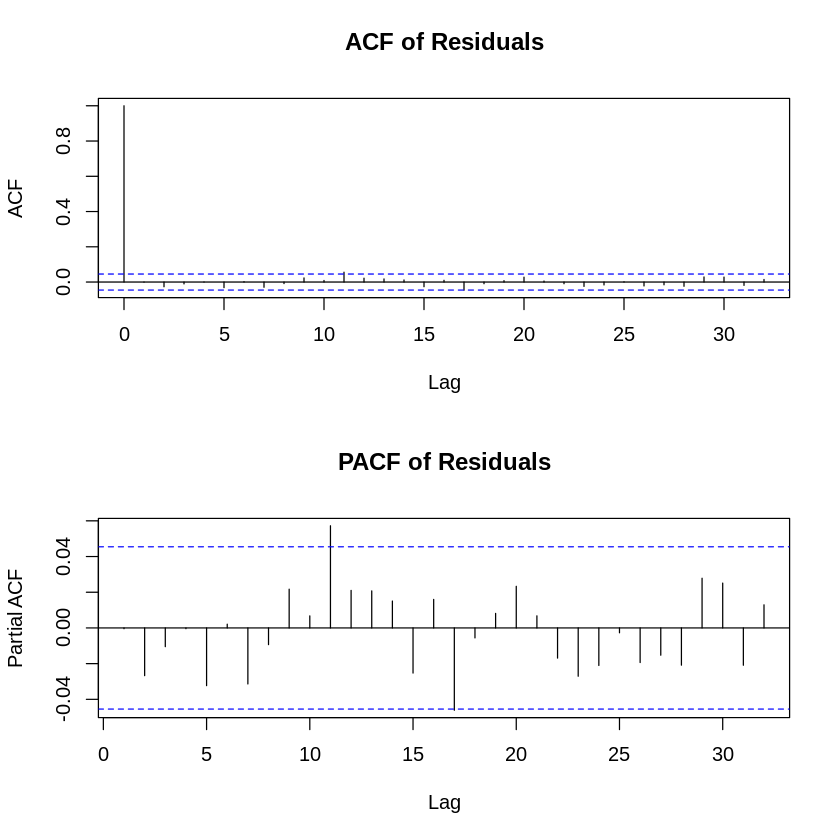

In [77]:
# Obtain the residuals from the fitted GARCH model
residuals <- residuals(garch_model)

# Plot ACF and PACF of residuals
par(mfrow = c(2, 1))
acf(residuals, main = "ACF of Residuals")
pacf(residuals, main = "PACF of Residuals")

In [78]:
# Ljung-Box test
Box.test(residuals, lag = 20, type = "Ljung-Box")


	Box-Ljung test

data:  residuals
X-squared = 21.207, df = 20, p-value = 0.385


**Un-correlation:** From the ACF, the PACF, and the Box-Ljung test we can conclude that the residuals seem to be uncorrelated

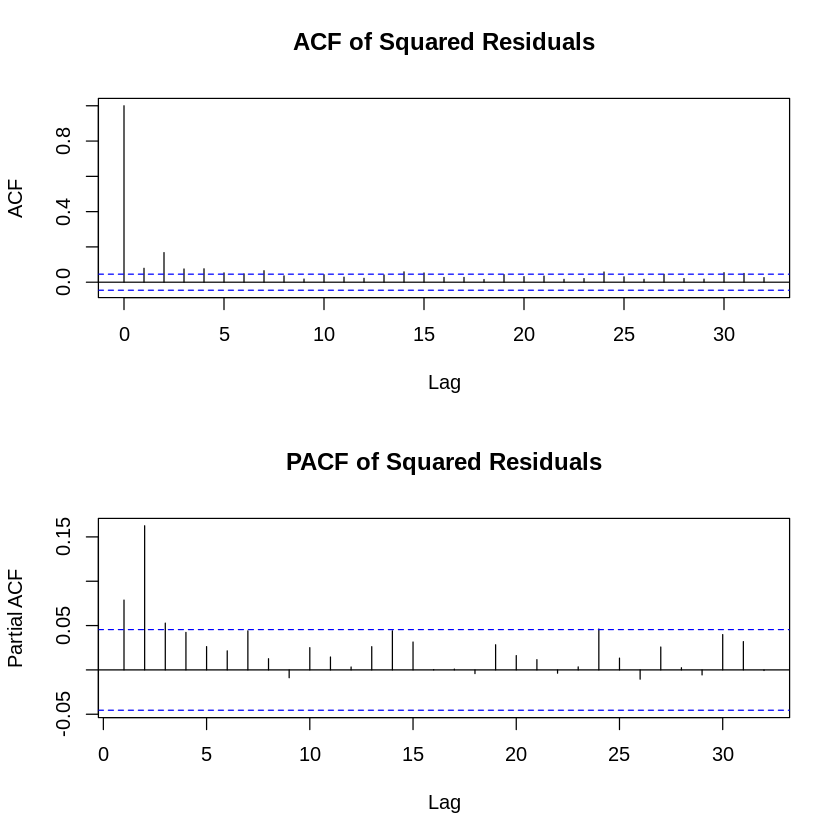

In [79]:
# Obtain the squared residuals
squared_residuals <- residuals^2

# Plot ACF and PACF of squared residuals
par(mfrow = c(2, 1))
acf(squared_residuals, main = "ACF of Squared Residuals")
pacf(squared_residuals, main = "PACF of Squared Residuals")

**Correation of the squares:** on the contrary, the squared residuals present some correlation

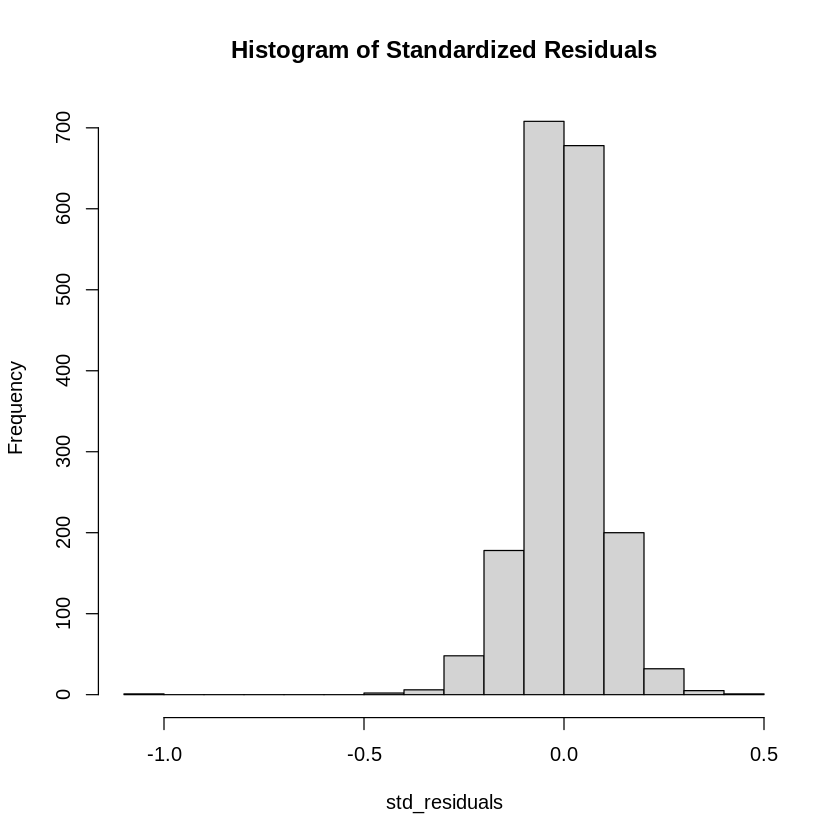

In [81]:
# Obtain standardized residuals
std_residuals <- residuals / sqrt(garch_model@sigma.t)

# Plot histogram or density plot of standardized residuals
hist(std_residuals, main = "Histogram of Standardized Residuals")

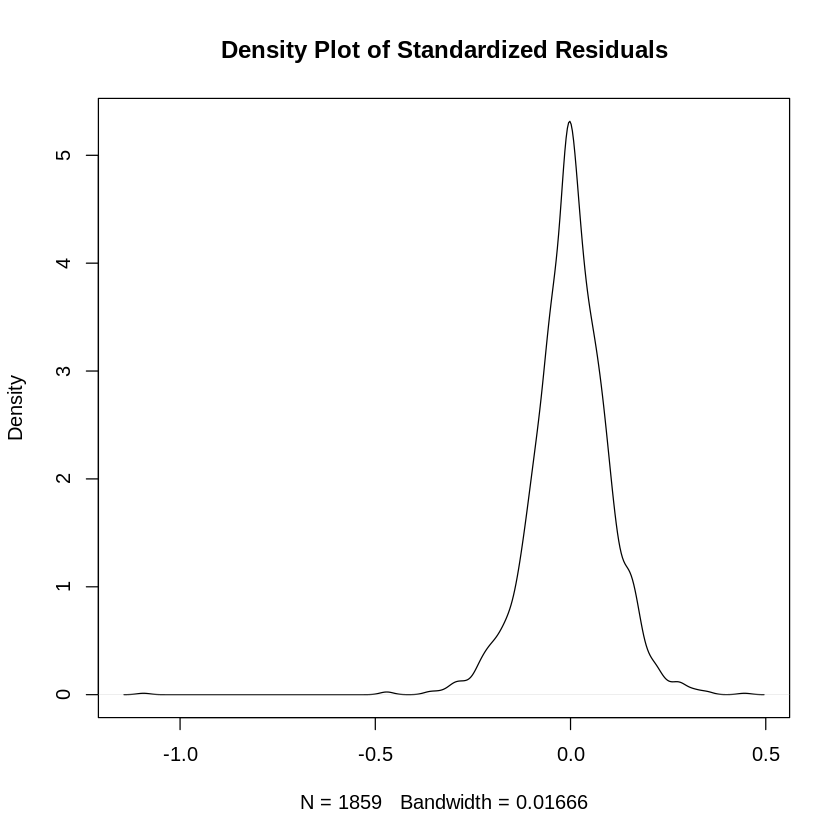

In [82]:
# Plot density plot of standardized residuals
plot(density(std_residuals), main = "Density Plot of Standardized Residuals")

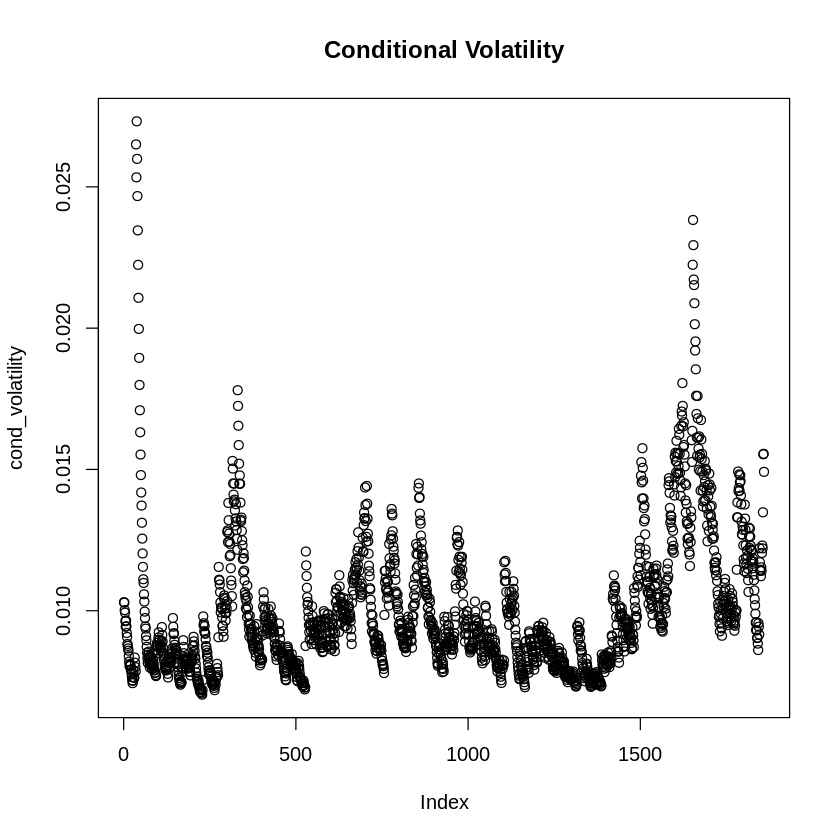

In [64]:
# Obtain conditional volatility from the GARCH model
cond_volatility <- volatility(garch_model)

# Plot the conditional volatility
plot(cond_volatility, main = "Conditional Volatility")

**Volatility Clustering:** We can observe that some volatility clusters are present, as we would expect from the nature of the data. It is worth noting that the presence of volatility clustering indicates that past volatility has a significant influence on future volatility. This behavior is often observed in financial time series data, where market shocks or events can trigger periods of high volatility followed by relative calmness.

In [65]:
# Summary of the fitted GARCH model
summary(garch_model)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = dax_returns) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x55a2a1718ac8>
 [data = dax_returns]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1       beta1  
6.5351e-04  4.7543e-06  6.8417e-02  8.8761e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     6.535e-04   2.158e-04    3.029  0.00245 ** 
omega  4.754e-06   1.264e-06    3.760  0.00017 ***
alpha1 6.842e-02   1.478e-02    4.630 3.66e-06 ***
beta1  8.876e-01   2.356e-02   37.677  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 5966.214    normalized:  3.209368 

Description:
 Sun May 28 10:16:05 2023 by user:  


Standardised Residuals Tests:
                                Statistic p-Value  
 Jarque-Bera Test   R    Chi^2  13380.71  0        
 Shapiro-Wilk Test  R    W      0.9477474 0       

Overall, considering the Standardised Residuals Tests and the Information Criterion Statistics computed, the model is a good model

## 2.5 Simulate a VAR(2) time series. Fit the best model and check that it is a good one.

In [83]:
# Install and load the 'vars' package
install.packages("vars")
library(vars)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘strucchange’, ‘urca’, ‘lmtest’, ‘sandwich’


Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest



For this we can use the vars libray. The reference manual can be found [here](https://cran.r-project.org/web/packages/vars/vars.pdf)

Warning message in VAR(simulated_data, p = p):
“No column names supplied in y, using: y1, y2 , instead.
”


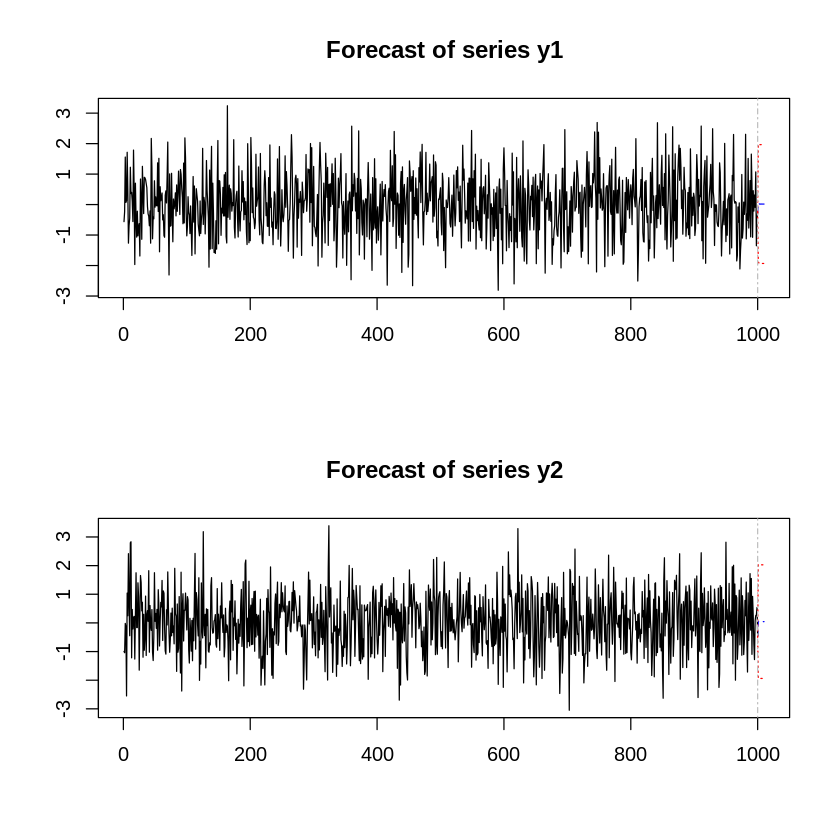

In [167]:
# Simulate VAR(2) time series
set.seed(123)
n <- 1000  # Number of observations
p <- 2     # Order of the VAR model

# Generate random simulated_data
simulated_data <- matrix(rnorm(n * 2), ncol = 2)

# Create the VAR model
var_model <- VAR(simulated_data, p = p)

# Simulate the VAR(2) time series
var_data <- predict(var_model, n)

# Plot the simulated series
plot(var_data)

In [173]:
# Extract the actual time series data 
y1 <- var_data[1]$fcst$y1[, 'fcst']
y2 <- var_data[1]$fcst$y2[, 'fcst']

# Create a matrix or data frame with the extracted time series data to be in the correct matrix form for the VAR function
var_data_matrix <- data.frame(y1, y2)

# Fit the VAR(2) model to the simulated data
var_fit <- VAR(var_data_matrix, p = p)

# Print the model summary
summary(var_fit)

Warning message in summary.lm(X[[i]], ...):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(X[[i]], ...):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”



VAR Estimation Results:
Endogenous variables: y1, y2 
Deterministic variables: const 
Sample size: 8 
Log Likelihood: 666.113 
Roots of the characteristic polynomial:
0.2006 0.2006 0.1602 0.1602
Call:
VAR(y = var_data_matrix, p = p)


Estimation results for equation y1: 
y1 = y1.l1 + y2.l1 + y1.l2 + y2.l2 + const 

        Estimate Std. Error    t value Pr(>|t|)    
y1.l1 -2.678e-02  3.756e-15 -7.131e+12   <2e-16 ***
y2.l1 -2.642e-02  5.924e-15 -4.460e+12   <2e-16 ***
y1.l2 -2.793e-02  3.167e-15 -8.819e+12   <2e-16 ***
y2.l2 -2.711e-02  3.588e-15 -7.554e+12   <2e-16 ***
const  2.019e-02  3.020e-16  6.687e+13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 9.179e-19 on 3 degrees of freedom
Multiple R-Squared:     1,	Adjusted R-squared:     1 
F-statistic: 1.027e+30 on 4 and 3 DF,  p-value: < 2.2e-16 


Estimation results for equation y2: 
y2 = y1.l1 + y2.l1 + y1.l2 + y2.l2 + const 

        Estimate Std. Error    t value Pr(>|t

Overall, the "essentially perfect fit" indications, and the extremely high R-squared and F-statistic values suggest that the model may not be a reliable and good fit for the data. The model is likely overfitting the data

## 2.6 Simulate two co-integrated random walks and check that they are integrated processes and co-integrated.

In [78]:
# Install required packages
install.packages("vars")

# Load the required library
library(vars)

# Set the seed for reproducibility
set.seed(123)

# Define the parameters
n <- 1000  # Number of observations

# Simulate two co-integrated random walks
random_walks <- matrix(0, nrow = n, ncol = 2)
for (i in 2:n) {
  random_walks[i, ] <- random_walks[i-1, ] + rnorm(2)
}

# Convert the random walks to a time series object
random_walks_ts <- ts(random_walks)

# Perform the co-integration test
co_integ_test <- ca.jo(random_walks_ts, type = "trace", K = 2)

# Print the test results
print(summary(co_integ_test))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 5.796058e-03 7.105387e-05

Values of teststatistic and critical values of test:

         test 10pct  5pct  1pct
r <= 1 | 0.07  6.50  8.18 11.65
r = 0  | 5.87 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            Series.1.l2 Series.2.l2
Series.1.l2   1.0000000     1.00000
Series.2.l2   0.2257183    16.40448

Weights W:
(This is the loading matrix)

            Series.1.l2   Series.2.l2
Series.1.d -0.004867714 -1.928688e-05
Series.2.d  0.003070021 -3.654142e-05



both eigenvalues are very close to zero, it suggests that there is a co-integrating relationship between the two series. 
Comparing the trace statistic test with the critical values, we can conclude that there is at least one co-integrating relationship between the two series. The eigenvectors provide information about the co-integration relations between the series. In this case, the first eigenvector shows that both series have a co-integrating relationship with coefficients of approximately 1. The second eigenvector indicates that the second series has a much larger coefficient (approximately 16.40448) compared to the first series (approximately 0.2257183)</br>
In summary, based on these results, we can conclude that the simulated random walks are indeed integrated processes and exhibit a co-integration relationship

## 2.7 Check if some of the four series in EuStockMarkets are co-integrated.

In [86]:
library(urca)

# Load the EuStockMarkets dataset
data("EuStockMarkets")

# Extract the series of interest
series <- as.data.frame(EuStockMarkets[, c("DAX", "SMI", "CAC", "FTSE")])

# Perform the Johansen test for co-integration
johansen_result <- ca.jo(series, ecdet = "none", type = "trace", K = 2)

# Print the test results
summary(johansen_result)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.0182342226 0.0150470226 0.0033140757 0.0002164498

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 3 |  0.40  6.50  8.18 11.65
r <= 2 |  6.57 15.66 17.95 23.52
r <= 1 | 34.74 28.71 31.52 37.22
r = 0  | 68.93 45.23 48.28 55.43

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           DAX.l2     SMI.l2     CAC.l2      FTSE.l2
DAX.l2   1.000000  1.0000000  1.0000000  1.000000000
SMI.l2   1.391367 -0.8597600 -0.2444070  0.210712425
CAC.l2  -2.132574 -0.2120608 -1.6671590 -0.009850524
FTSE.l2 -2.461712  0.4424223  0.4560137 -1.259963393

Weights W:
(This is the loading matrix)

              DAX.l2       SMI.l2      CAC.l2       FTSE.l2
DAX.d  -0.0037640673 -0.024061087 0.002178267 -0.0005022082
SMI.d  -0.0053927489 -0.007377398 0.005003207 -0.0009368766
CAC.d   

The fact that all the eigenvalues are very close to zero, it suggests that there is co-integration among the four series. The trace statistic test is used to determine the number of co-integrating relationships. The test compares the test statistic with critical values at different significance levels, and it suggests the presence of co-integrating relationships. The eigenvectors provide information about the co-integration relations between the series. In this case, the first eigenvector indicates that all series have a co-integrating relationship with coefficients of approximately 1. The second eigenvector shows the relationships between the series with coefficients specific to each series. </br>
In summary, the results suggest that the four series in EuStockMarkets are co-integrated, indicating a long-term relationship between them. The co-integration implies that there is a common stochastic trend shared by all the series.